## Name : Adwaiy Singh
## Reg. No. : 220968424
## Sec. : A
## Batch: 2

# Week 6
## SVM

### 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import *

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold

### 2. Import dataset 

In [2]:
df = pd.read_csv("income_evaluation.csv")

### 3. Explore the data to gain insights about the data 
##### View dimension

In [3]:
df.shape

(32561, 15)

##### preview the dataset

In [4]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


##### view the column names of the data frame

In [5]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

##### remove leading spaces from column names

In [6]:
df = df.rename(columns=lambda x: x.strip())
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


##### rename column names

In [7]:
df.set_axis(['age', 'work', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'gain', 'loss', 'hpw', 'country', 'income'], axis='columns', inplace=True)
df.head()

,age,work,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,gain,loss,hpw,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
le = LabelEncoder()
columns = ['work', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'country', 'income']
for col in columns:
    df[col] = le.fit_transform(df[col])
df.head()

,age,work,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,gain,loss,hpw,country,income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


##### check the distribution of the target_class column

In [9]:
df['income'].value_counts()

0    24720
1     7841
Name: income, dtype: int64

##### View the percentage distribution of the target_class column

In [10]:
df['income'].value_counts() * 100 /df['income'].count()

0    75.919044
1    24.080956
Name: income, dtype: float64

##### View the summary of the dataset

In [11]:
df.describe()

,age,work,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,gain,loss,hpw,country,income
count,32561.000000,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,3.868892,1.897784e+05,10.298210,10.080679,2.611836,6.572740,1.446362,3.665858,0.669205,1077.648844,87.303830,40.437456,36.718866,0.240810
std,13.640433,1.455960,1.055500e+05,3.870264,2.572720,1.506222,4.228857,1.606771,0.848806,0.470506,7385.292085,402.960219,12.347429,7.823782,0.427581
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178270e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783560e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.370510e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


##### Explore missing values in variables

In [12]:
df.isnull().sum()

age               0
work              0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
gain              0
loss              0
hpw               0
country           0
income            0
dtype: int64

##### view summary statistics in numerical variables

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   work            32561 non-null  int32
 2   fnlwgt          32561 non-null  int64
 3   education       32561 non-null  int32
 4   education-num   32561 non-null  int64
 5   marital-status  32561 non-null  int32
 6   occupation      32561 non-null  int32
 7   relationship    32561 non-null  int32
 8   race            32561 non-null  int32
 9   sex             32561 non-null  int32
 10  gain            32561 non-null  int64
 11  loss            32561 non-null  int64
 12  hpw             32561 non-null  int64
 13  country         32561 non-null  int32
 14  income          32561 non-null  int32
dtypes: int32(9), int64(6)
memory usage: 2.6 MB


##### draw boxplots to visualize outliers

<AxesSubplot:>

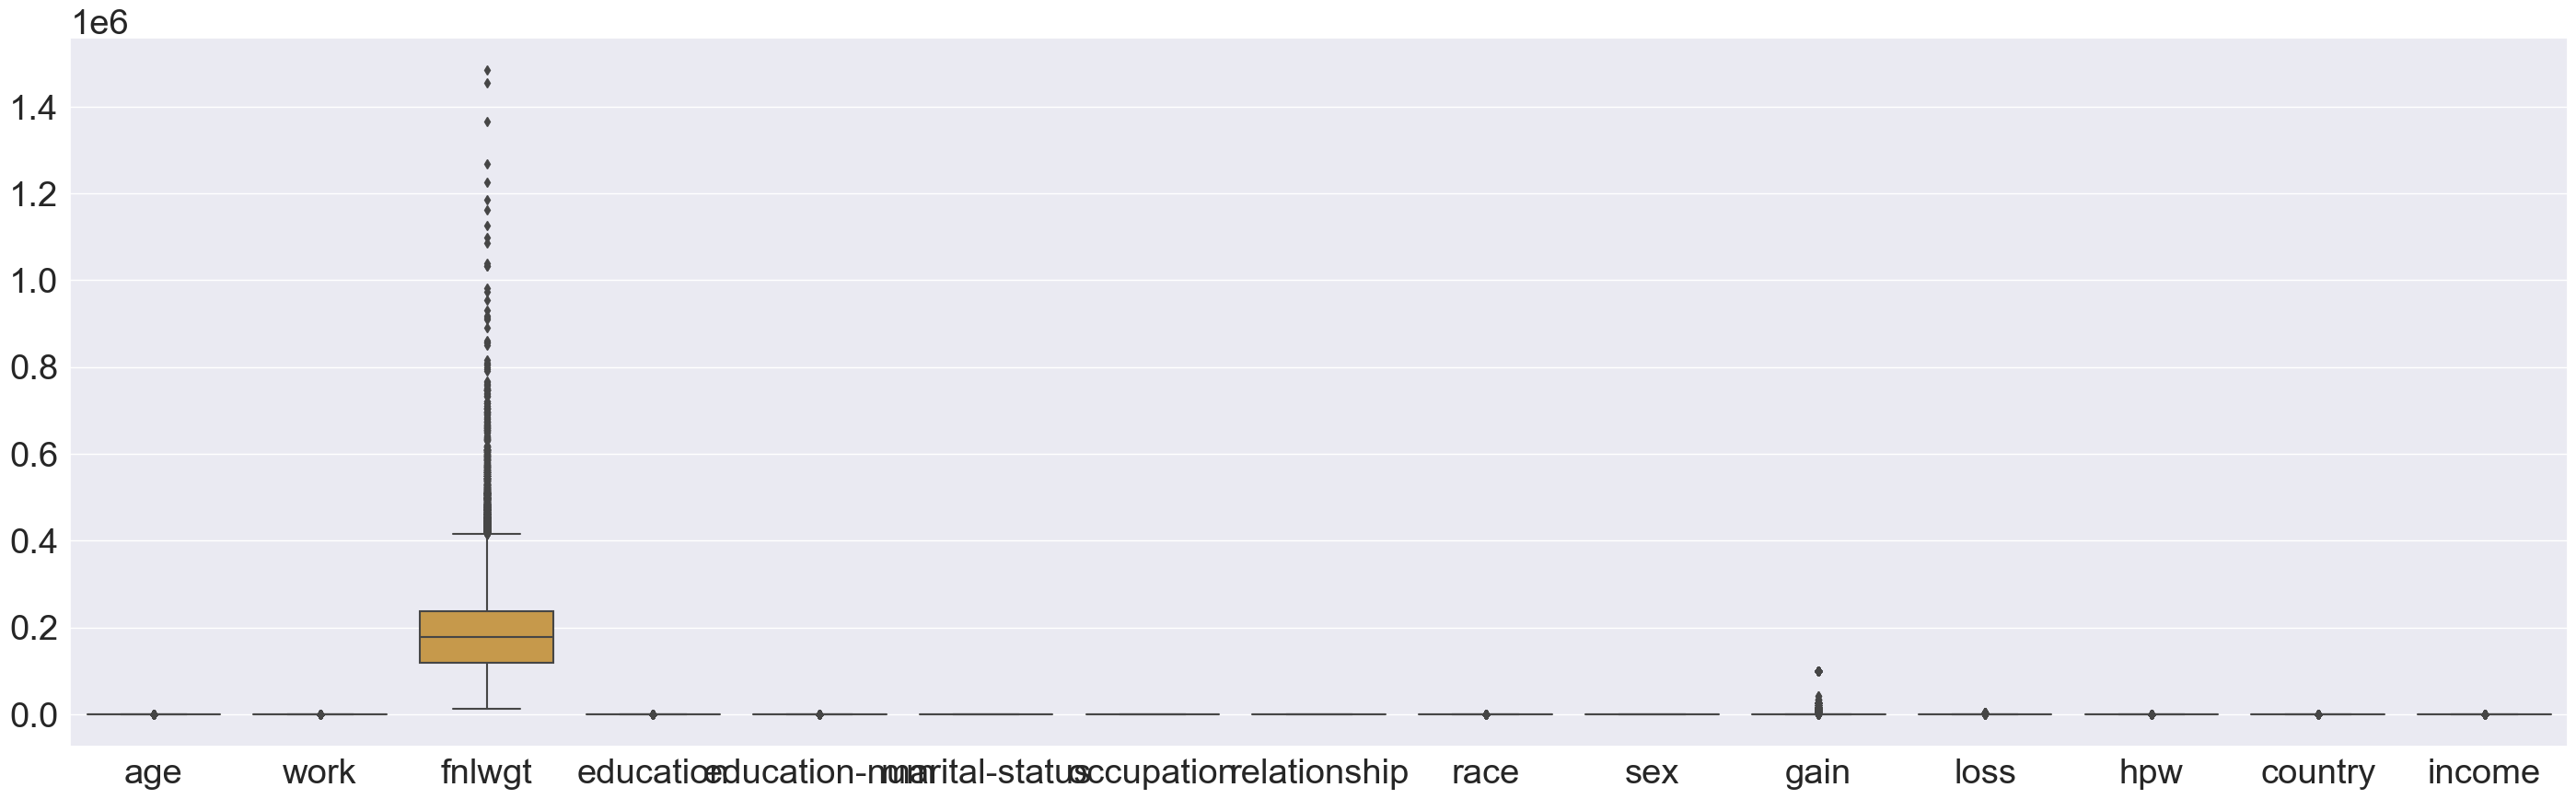

In [14]:
sns.set(rc={"figure.figsize":(35, 10)})
sns.set(font_scale=2.5)
sns.boxplot(data=df)

### 4. Check the distribution of variables

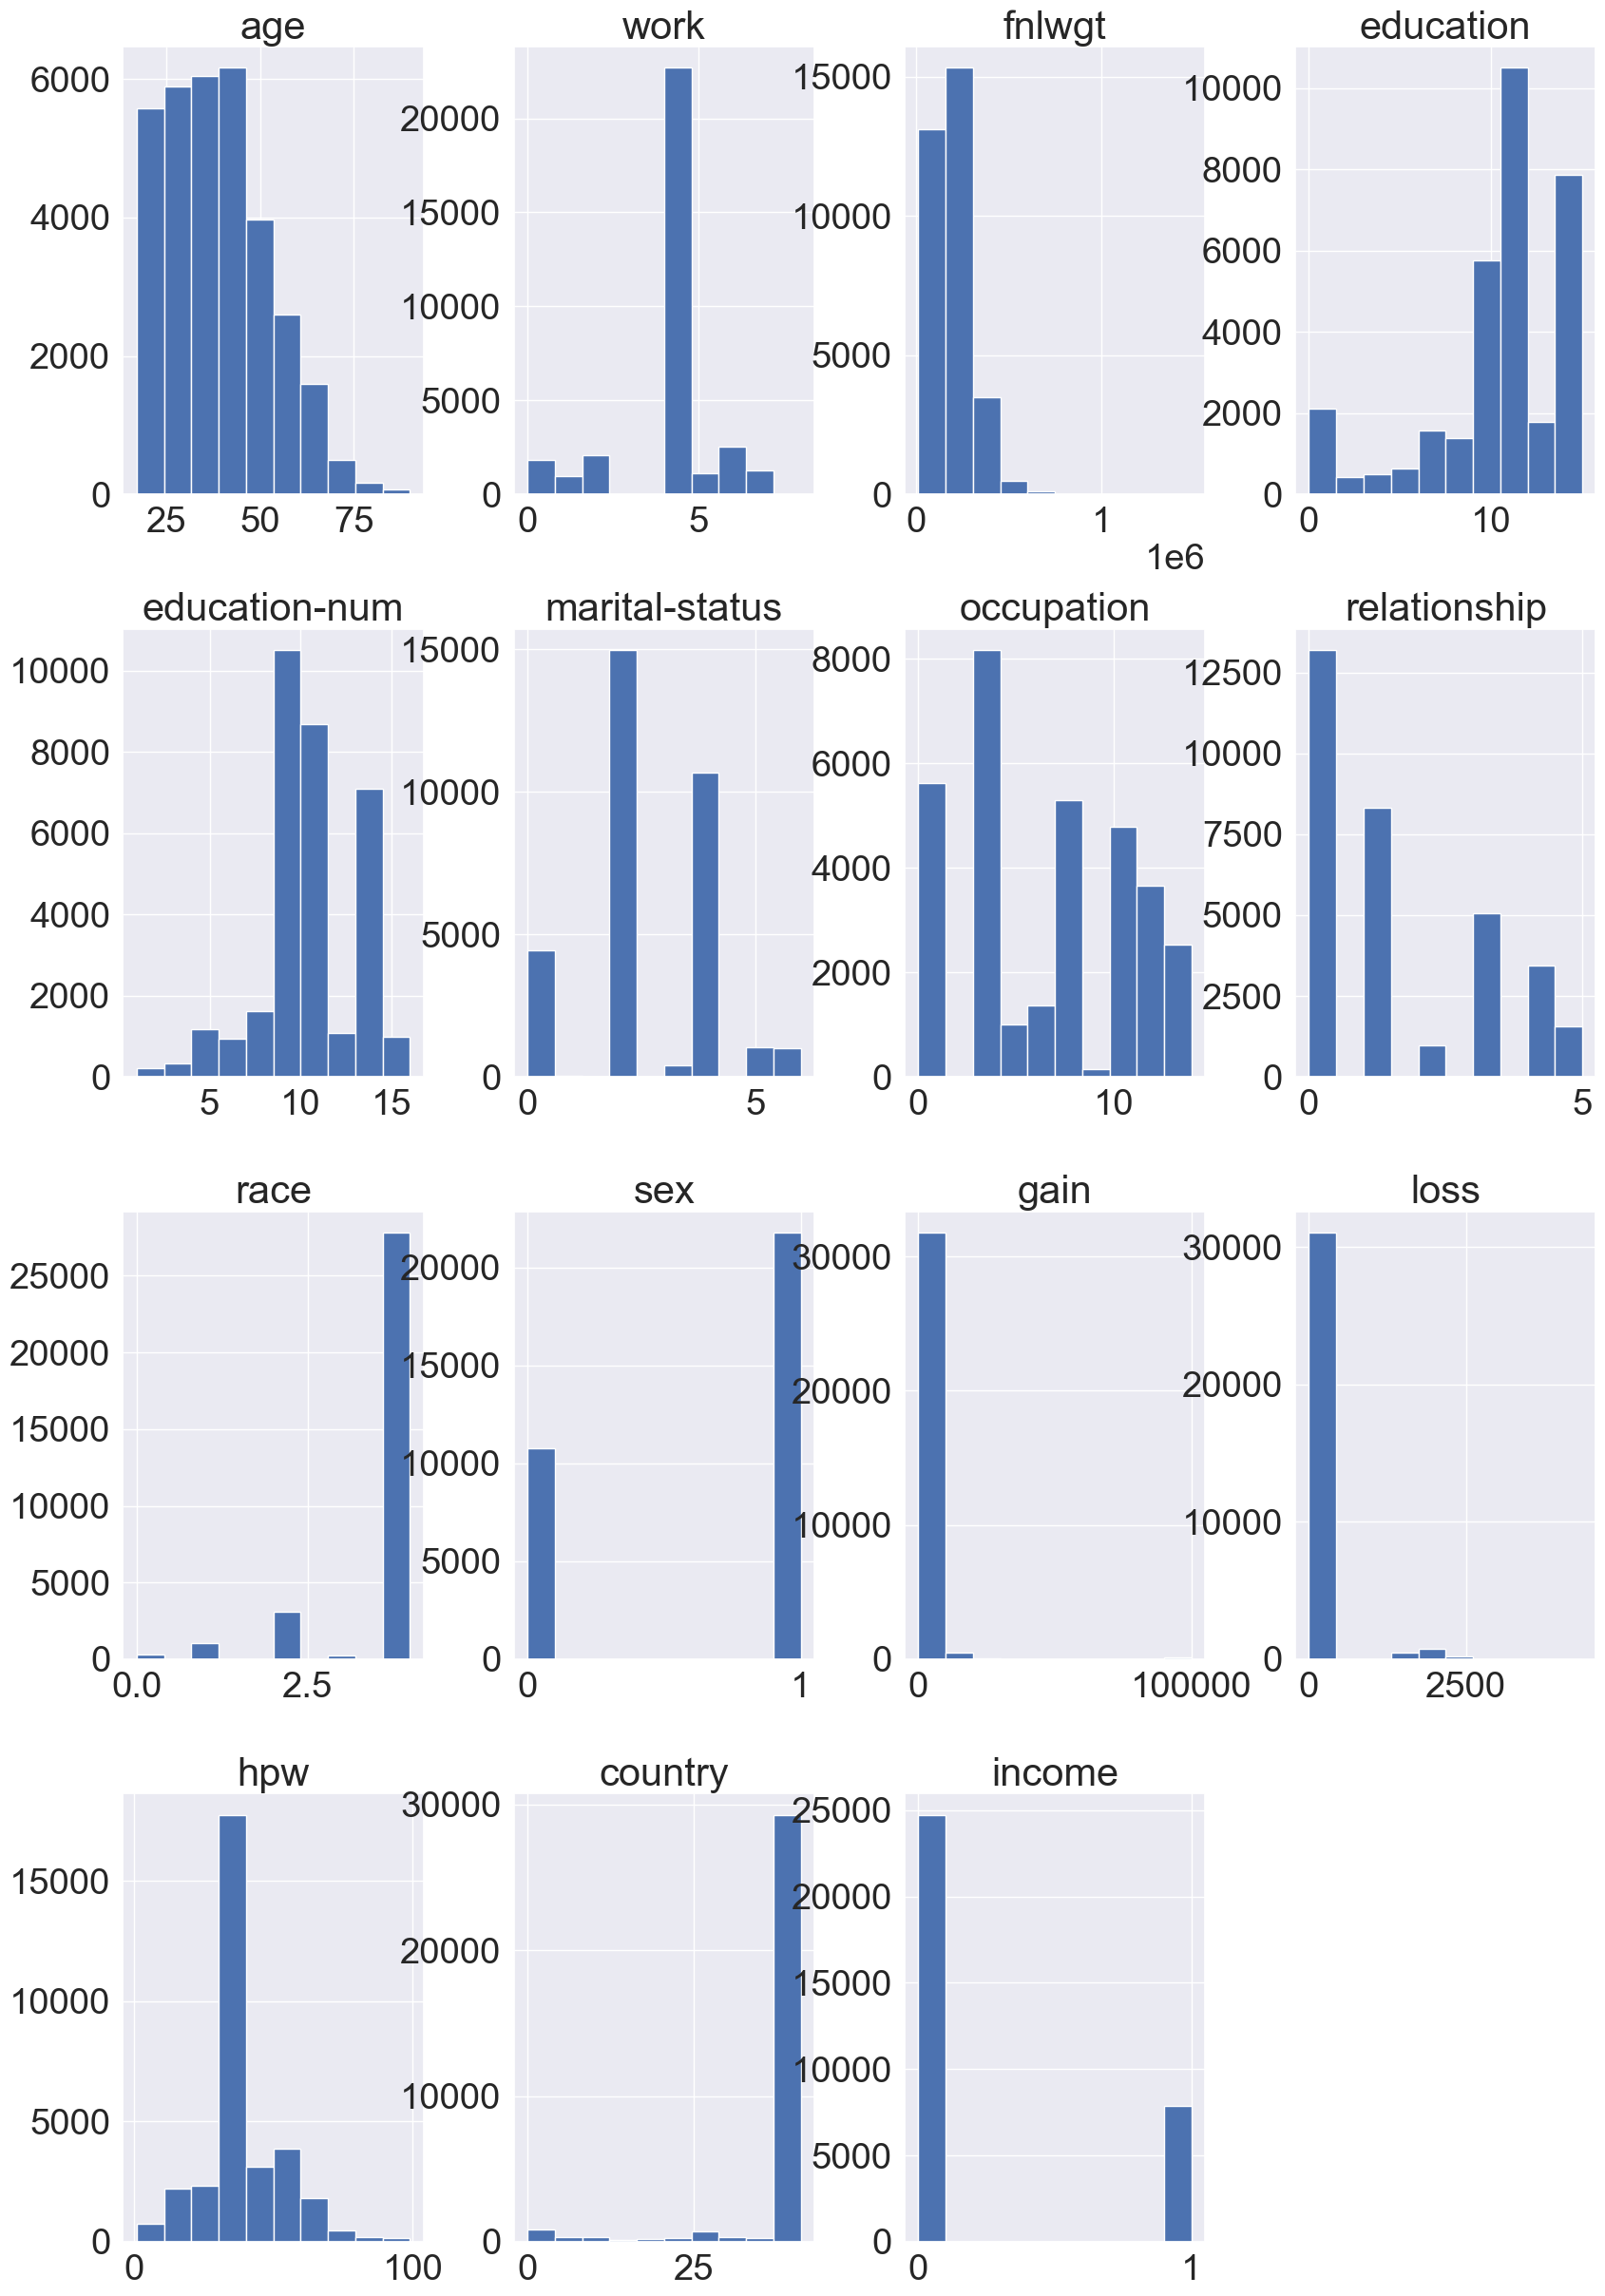

In [15]:
df.hist(figsize=(20,30))
plt.show()

### 5. Split data into separate training and test set 

In [16]:
x = df.drop('income', axis=1)
y = df['income']
print(x)
print(y)

       age  work  fnlwgt  education  education-num  marital-status  \
0       39     7   77516          9             13               4   
1       50     6   83311          9             13               2   
2       38     4  215646         11              9               0   
3       53     4  234721          1              7               2   
4       28     4  338409          9             13               2   
...    ...   ...     ...        ...            ...             ...   
32556   27     4  257302          7             12               2   
32557   40     4  154374         11              9               2   
32558   58     4  151910         11              9               6   
32559   22     4  201490         11              9               4   
32560   52     5  287927         11              9               2   

       occupation  relationship  race  sex   gain  loss  hpw  country  
0               1             1     4    1   2174     0   40       39  
1              

### 6. Feature Scaling

In [17]:
scaler = MinMaxScaler()
scale = scaler.fit(x)

In [18]:
x = scale.transform(x)
print(x)

[[0.30136986 0.875      0.0443019  ... 0.         0.39795918 0.95121951]
 [0.45205479 0.75       0.0482376  ... 0.         0.12244898 0.95121951]
 [0.28767123 0.5        0.13811345 ... 0.         0.39795918 0.95121951]
 ...
 [0.56164384 0.5        0.09482688 ... 0.         0.39795918 0.95121951]
 [0.06849315 0.5        0.12849934 ... 0.         0.19387755 0.95121951]
 [0.47945205 0.625      0.18720338 ... 0.         0.39795918 0.95121951]]


In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [20]:
C_val = [1.0, 100.0, 1000.0]

### 7. Run SVM with default hyperparameters 
#### Run SVM with rbf kernel and C=1.0 and gamma=auto 
#### Run SVM with rbf kernel and C=100.0
#### Run SVM with rbf kernel and C=1000.0

### 11. Compare the train-set and test-set accuracy 
### 12. Check for overfitting and underfitting 
### 13. visualize confusion matrix with seaborn heatmap 
### 14. Generate classification report  
### 15. Evaluate classification accuracy 
### 16. Evaluate Classification error 
### 17. Plot ROC Curve 
### 18. Compute ROC AUC 
### 21. Stratified k-fold cross-validation with shuffle split with rbf kernel

C value =  1.0
Train Accuracy = 0.8283608283608284
Test Accuracy = 0.8312007370252841

Classification Report (check for overfitting and underfitting)
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      7455
           1       0.75      0.43      0.54      2314

    accuracy                           0.83      9769
   macro avg       0.80      0.69      0.72      9769
weighted avg       0.82      0.83      0.81      9769

Classification accuracy = 0.8312007370252841
Classification error = 0.16879926297471592


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


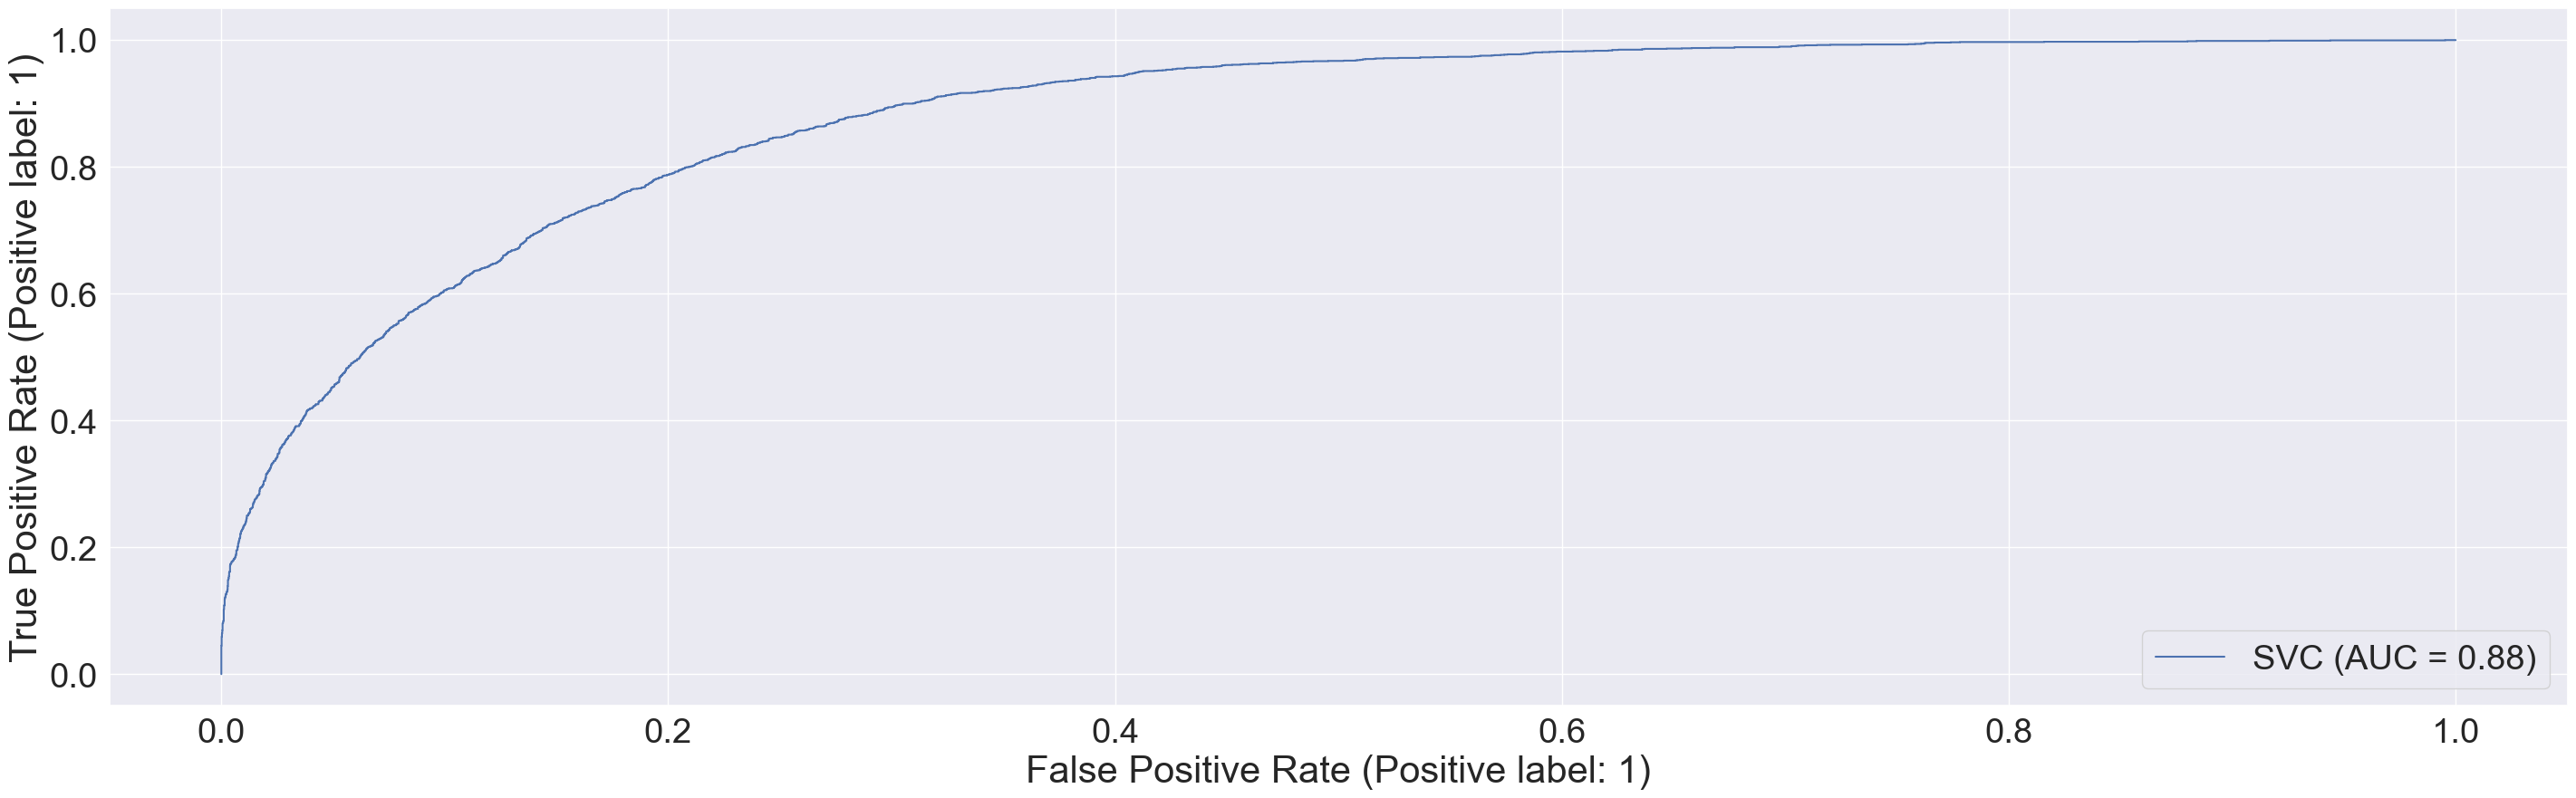

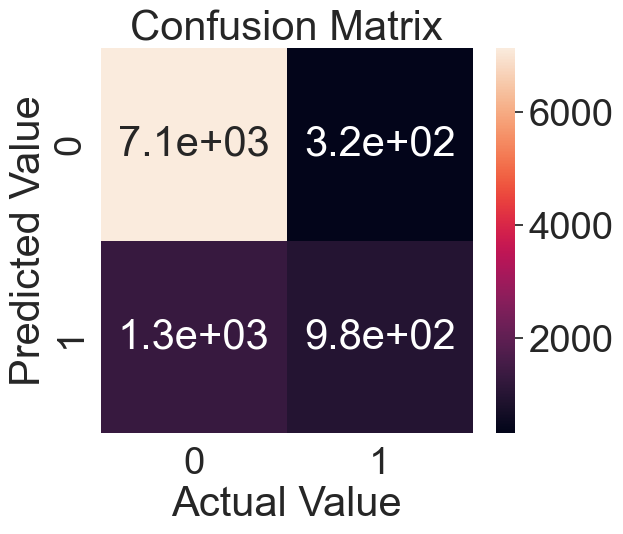

List of possible accuracy: [0.8249493274368896, 0.8294637921503594, 0.8297245001382106]

Maximum Accuracy: 82.97245001382106 %
Minimum Accuracy: 82.49493274368896 %
Overall Accuracy: 82.804587324182 %
Standard Deviation is: 0.002684853646896915




C value =  100.0
Train Accuracy = 0.8495524745524745
Test Accuracy = 0.8496263691268298

Classification Report (check for overfitting and underfitting)
              precision    recall  f1-score   support

           0       0.87      0.94      0.91      7455
           1       0.74      0.56      0.64      2314

    accuracy                           0.85      9769
   macro avg       0.81      0.75      0.77      9769
weighted avg       0.84      0.85      0.84      9769

Classification accuracy = 0.8496263691268298
Classification error = 0.15037363087317024


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


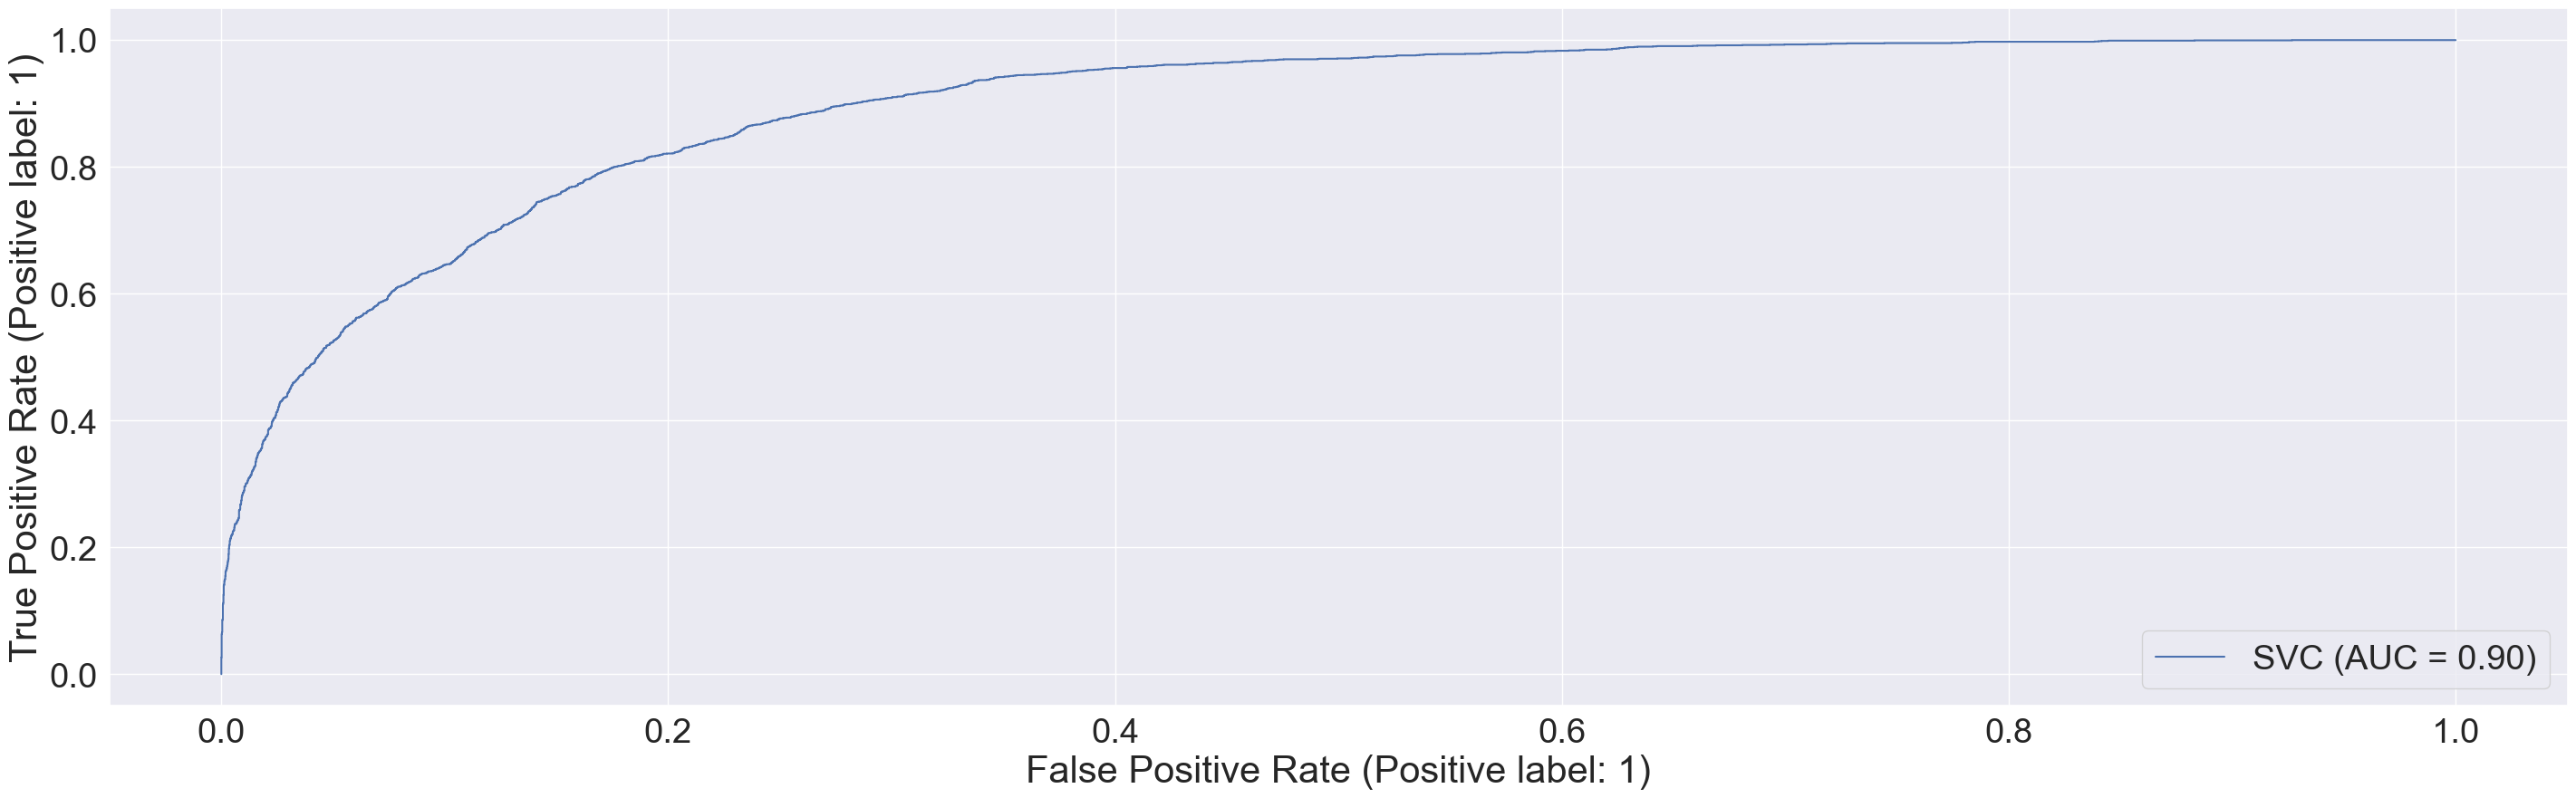

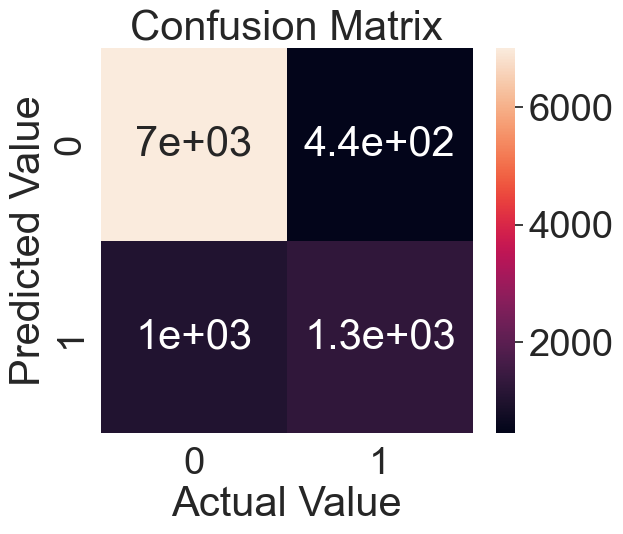

List of possible accuracy: [0.8431914501566243, 0.8540630182421227, 0.8452040910347369]

Maximum Accuracy: 85.40630182421228 %
Minimum Accuracy: 84.31914501566243 %
Overall Accuracy: 84.7486186477828 %
Standard Deviation is: 0.005783918902261641




C value =  1000.0
Train Accuracy = 0.8509126009126009
Test Accuracy = 0.8501381922407616

Classification Report (check for overfitting and underfitting)
              precision    recall  f1-score   support

           0       0.87      0.94      0.91      7455
           1       0.74      0.57      0.64      2314

    accuracy                           0.85      9769
   macro avg       0.81      0.75      0.77      9769
weighted avg       0.84      0.85      0.84      9769

Classification accuracy = 0.8501381922407616
Classification error = 0.1498618077592384


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


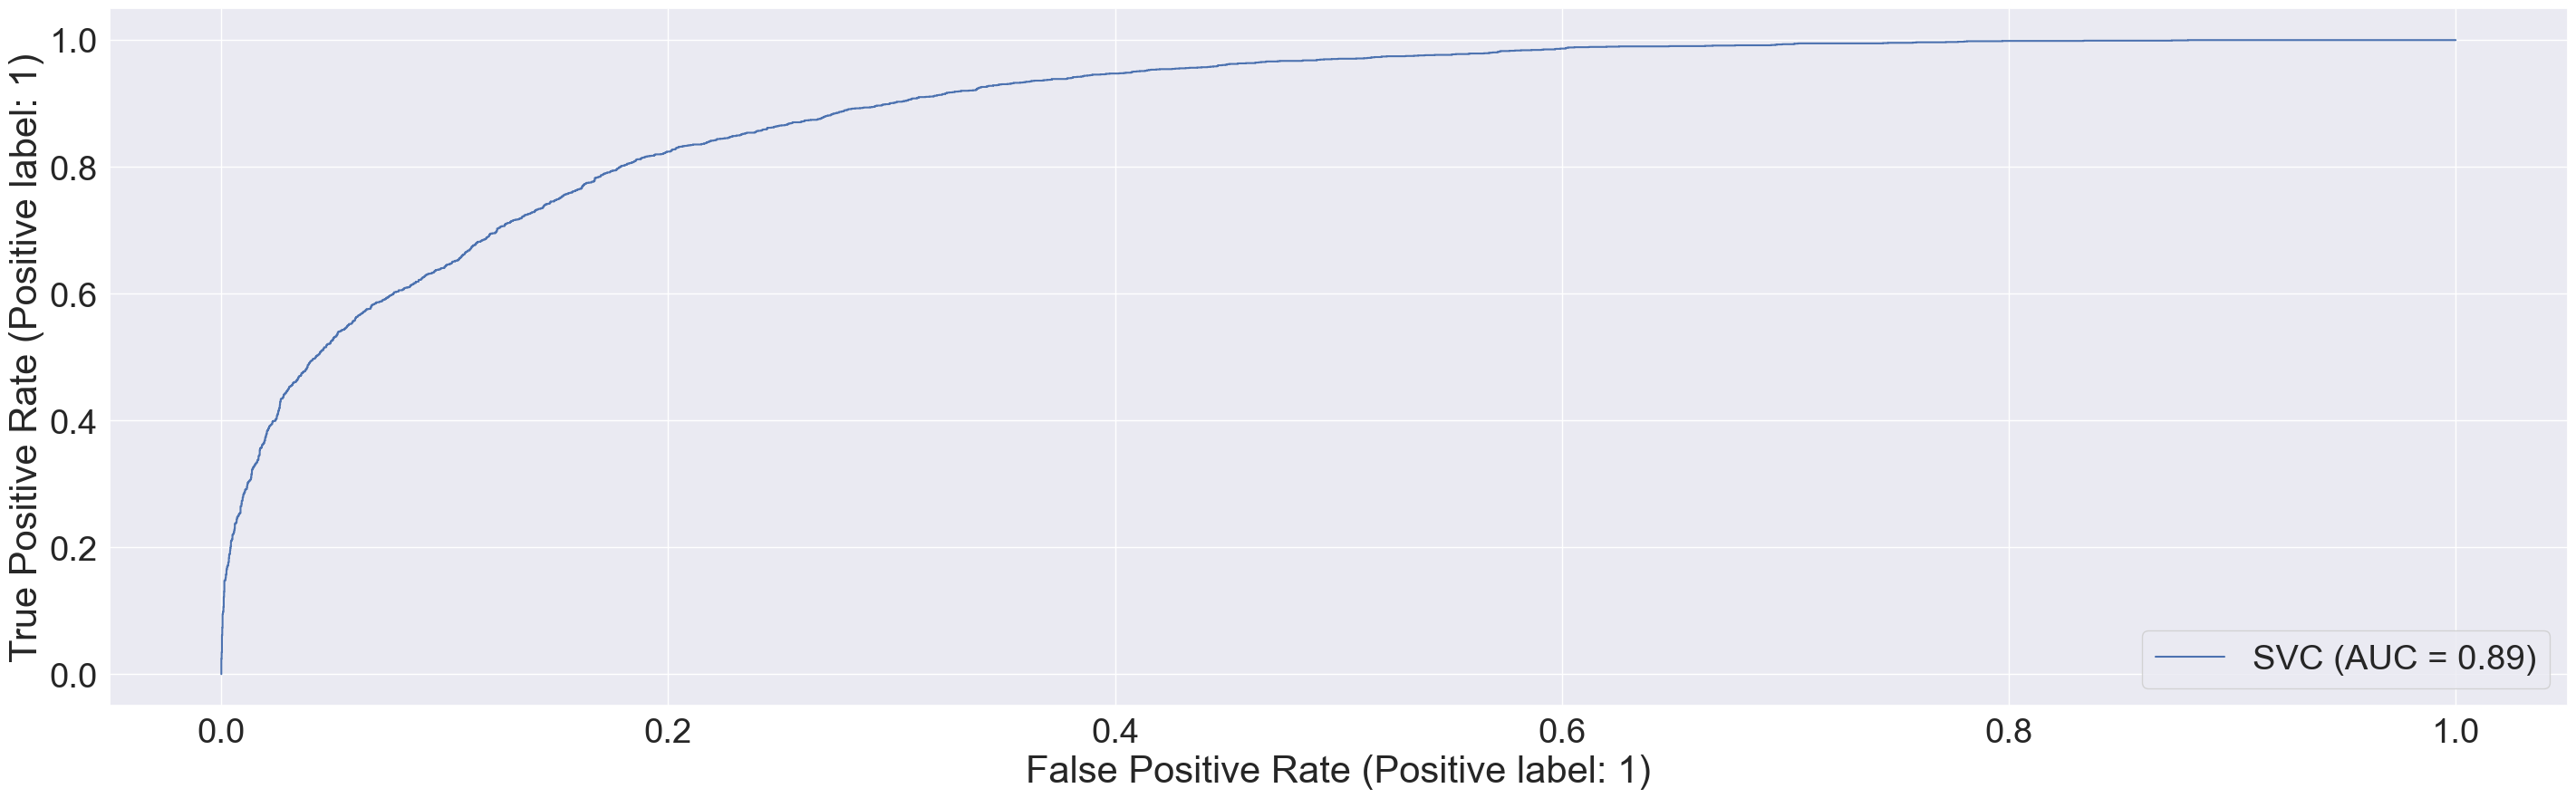

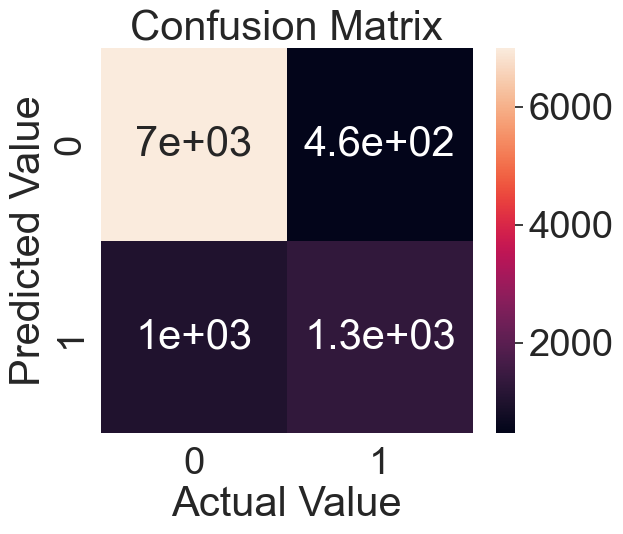

List of possible accuracy: [0.8447576930163995, 0.8536944905104109, 0.8444669676587119]

Maximum Accuracy: 85.36944905104109 %
Minimum Accuracy: 84.44669676587118 %
Overall Accuracy: 84.76397170618407 %
Standard Deviation is: 0.005245602104957376






In [21]:
for C in C_val:
    svm = SVC(kernel='rbf', C=C, gamma='auto')
    
    svm.fit(x_train, y_train)
    
    y_pred_test = svm.predict(x_test)
    y_pred_train = svm.predict(x_train)
    
    acc_test = accuracy_score(y_test, y_pred_test)
    acc_train = accuracy_score(y_train, y_pred_train)
    print("C value = ", C)
    print("Train Accuracy =", acc_train)
    print("Test Accuracy =", acc_test)
    
    print("\nClassification Report (check for overfitting and underfitting)")
    print(classification_report(y_test, y_pred_test))
    
    print("Classification accuracy =", acc_test)
    print("Classification error =", 1 - acc_test)
    
    plot_roc_curve(svm, x_test, y_test)
    
    plt.figure(figsize=(6,5))
    sns.heatmap(confusion_matrix(y_test, y_pred_test),annot = True)
    plt.xlabel('Actual Value')
    plt.ylabel('Predicted Value')
    plt.title('Confusion Matrix')
    plt.show()
    
    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)
    lst_accu_stratified = []
  
    for train_index, test_index in skf.split(x, y):
        x_train_fold, x_test_fold = x[train_index], x[test_index]
        y_train_fold, y_test_fold = y[train_index], y[test_index]
        svm.fit(x_train_fold, y_train_fold)
        y_pred_test_fold = svm.predict(x_test_fold)
        lst_accu_stratified.append(accuracy_score(y_pred_test_fold, y_test_fold))
        
    print('List of possible accuracy:', lst_accu_stratified)
    print('\nMaximum Accuracy:',max(lst_accu_stratified)*100, '%')
    print('Minimum Accuracy:', min(lst_accu_stratified)*100, '%')
    print('Overall Accuracy:', mean(lst_accu_stratified)*100, '%')
    print('Standard Deviation is:', stdev(lst_accu_stratified))
    print('\n\n\n')

### 8. Run SVM with linear kernel 
#### Run SVM with linear kernel and C=1.0
#### Run SVM with linear kernel and C=100.0
#### Run SVM with linear kernel and C=1000.0

### 11. Compare the train-set and test-set accuracy 
### 12. Check for overfitting and underfitting 
### 13. visualize confusion matrix with seaborn heatmap 
### 14. Generate classification report  
### 15. Evaluate classification accuracy 
### 16. Evaluate Classification error 
### 17. Plot ROC Curve 
### 18. Compute ROC AUC 
### 19. Stratified k-fold cross-validation with shuffle split with linear kernel

C value =  1.0
Train Accuracy = 0.8147156897156898
Test Accuracy = 0.8218855563517249

Classification Report (check for overfitting and underfitting)
              precision    recall  f1-score   support

           0       0.82      0.98      0.89      7455
           1       0.82      0.32      0.46      2314

    accuracy                           0.82      9769
   macro avg       0.82      0.65      0.68      9769
weighted avg       0.82      0.82      0.79      9769

Classification accuracy = 0.8218855563517249
Classification error = 0.1781144436482751


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


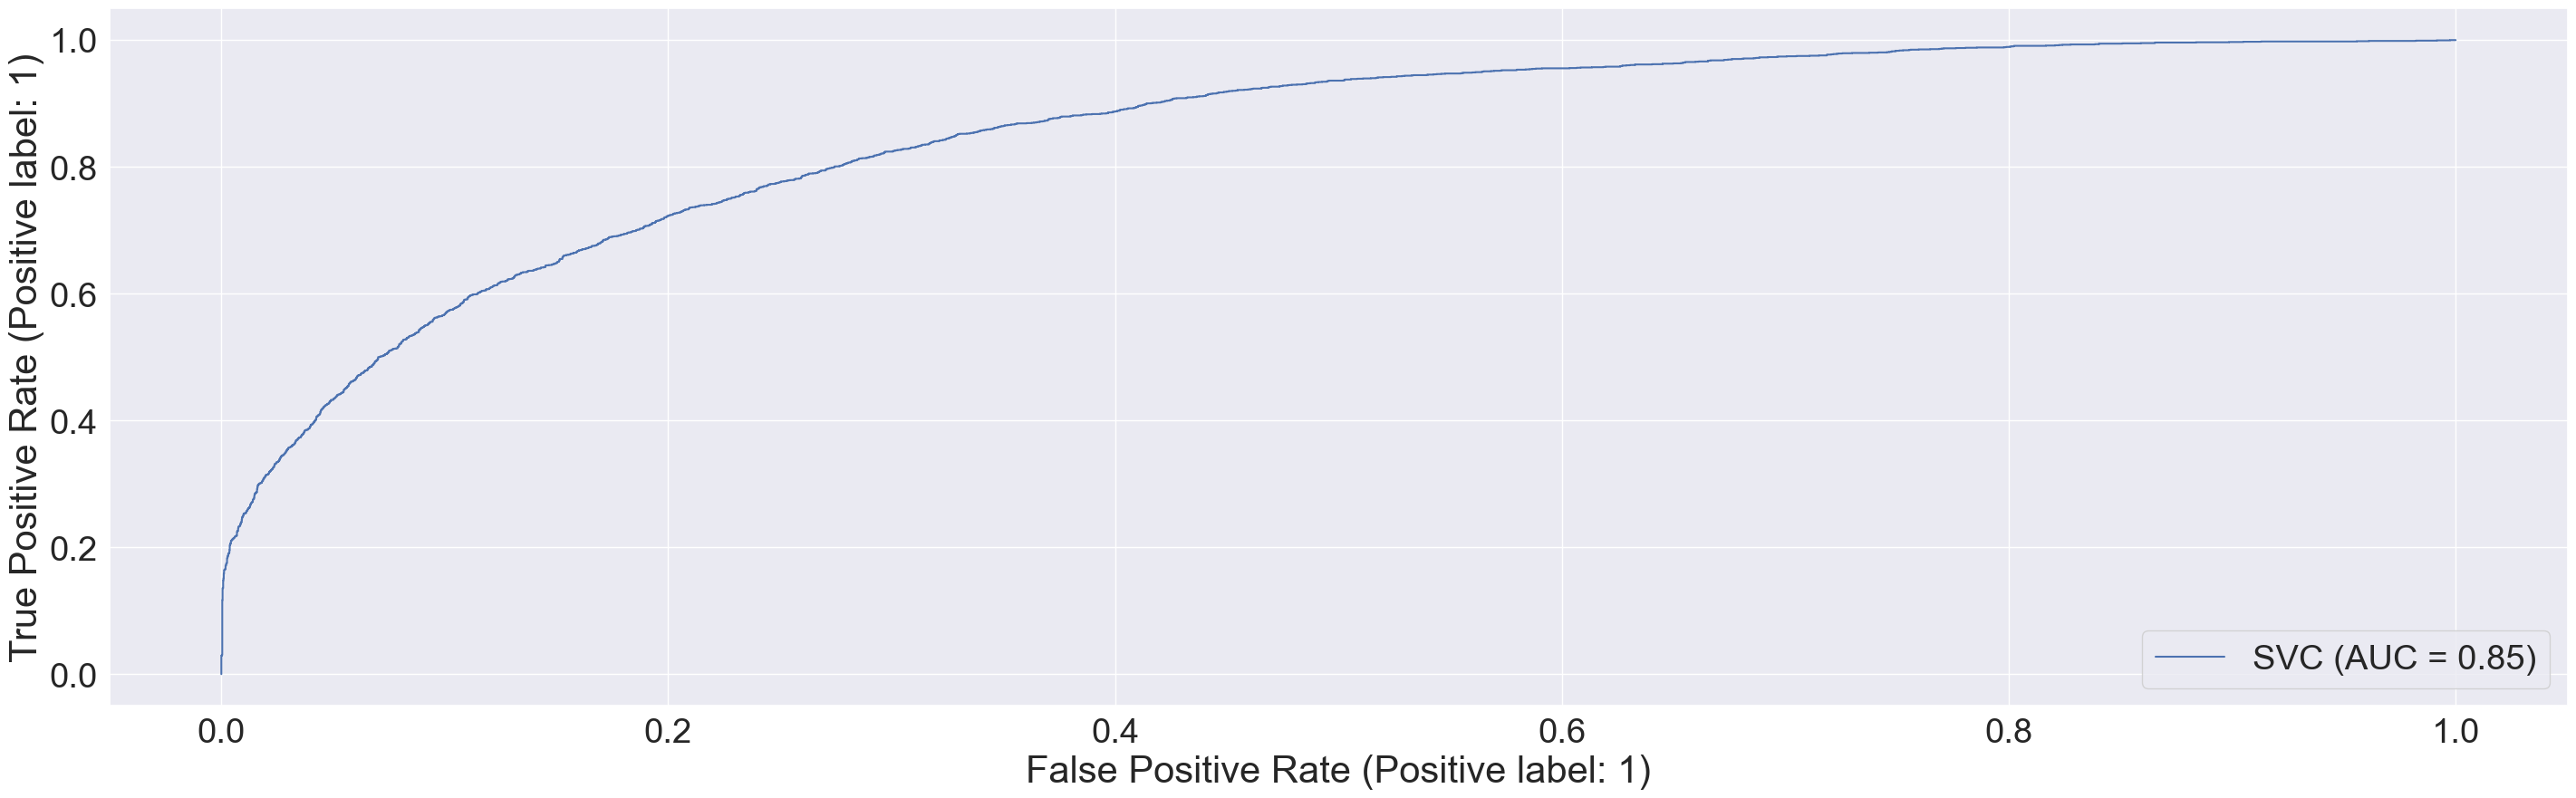

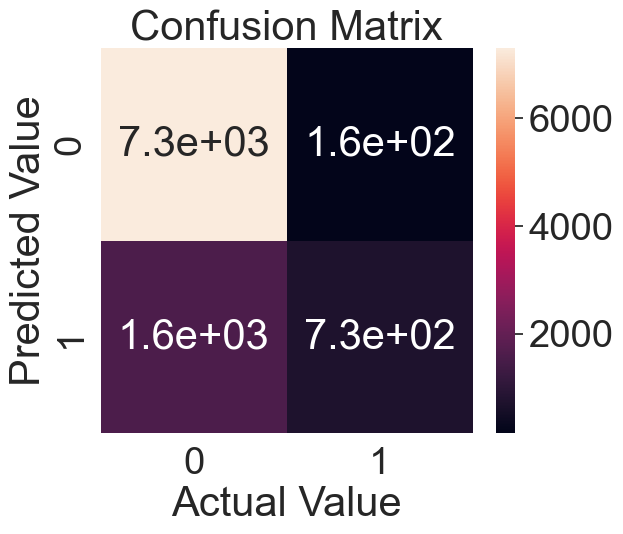

List of possible accuracy: [0.8146305509489589, 0.8211719181868435, 0.8122178199576154]

Maximum Accuracy: 82.11719181868435 %
Minimum Accuracy: 81.22178199576155 %
Overall Accuracy: 81.60067630311393 %
Standard Deviation is: 0.004632972970568788




C value =  100.0
Train Accuracy = 0.8141453141453141
Test Accuracy = 0.8203500870099294

Classification Report (check for overfitting and underfitting)
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      7455
           1       0.80      0.32      0.46      2314

    accuracy                           0.82      9769
   macro avg       0.81      0.65      0.68      9769
weighted avg       0.82      0.82      0.79      9769

Classification accuracy = 0.8203500870099294
Classification error = 0.1796499129900706


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


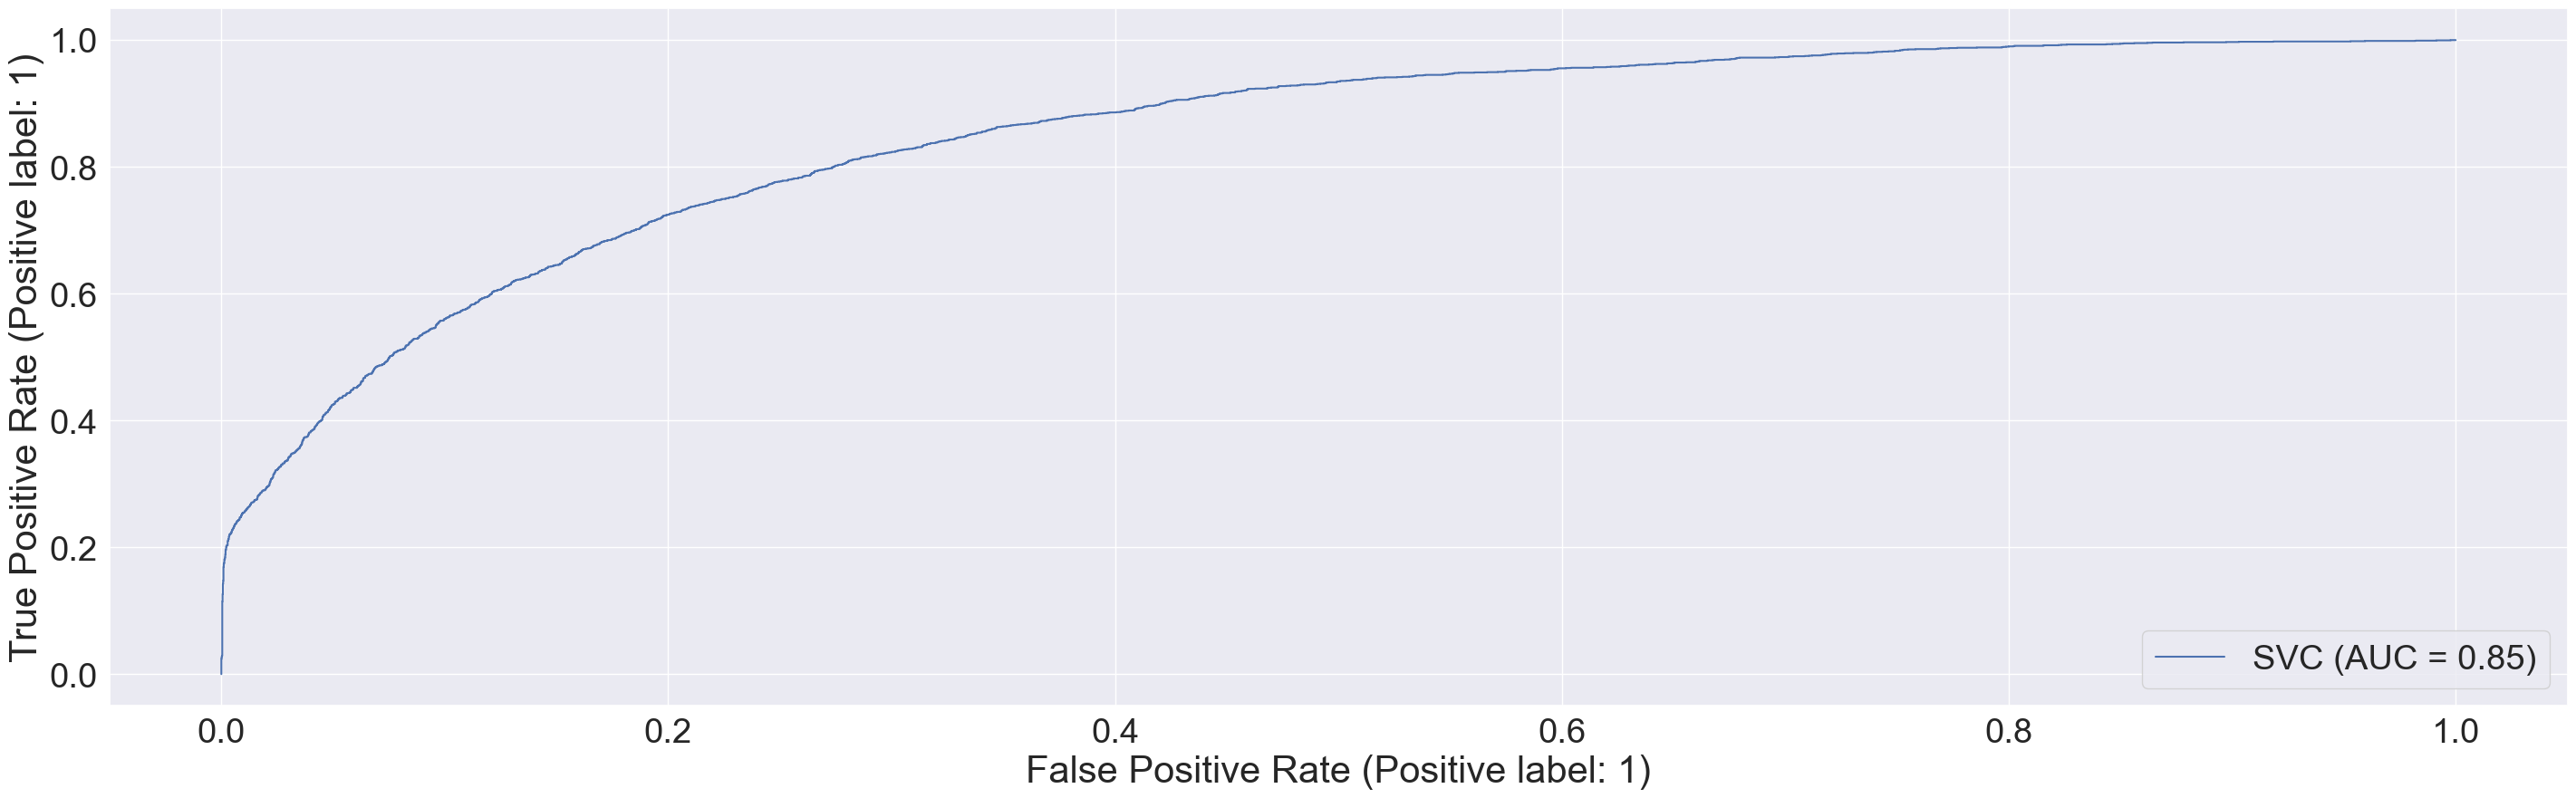

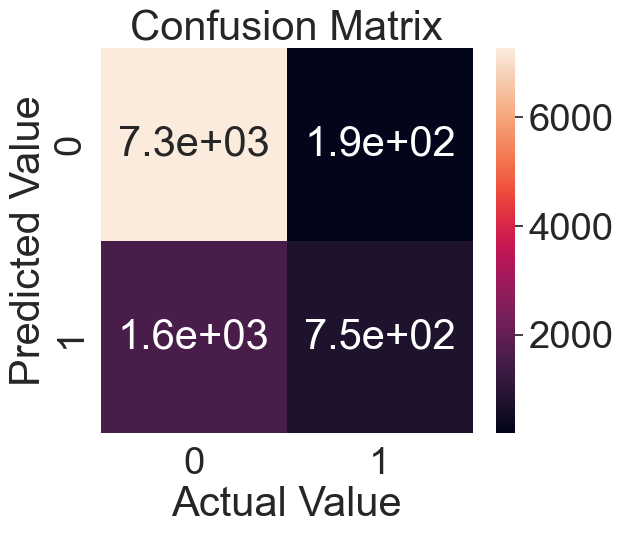

List of possible accuracy: [0.8141698912843192, 0.8195135433941404, 0.8099143094075371]

Maximum Accuracy: 81.95135433941404 %
Minimum Accuracy: 80.9914309407537 %
Overall Accuracy: 81.45325813619989 %
Standard Deviation is: 0.004809883714989963




C value =  1000.0
Train Accuracy = 0.8141014391014391
Test Accuracy = 0.8204524516327157

Classification Report (check for overfitting and underfitting)
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      7455
           1       0.80      0.32      0.46      2314

    accuracy                           0.82      9769
   macro avg       0.81      0.65      0.68      9769
weighted avg       0.82      0.82      0.79      9769

Classification accuracy = 0.8204524516327157
Classification error = 0.17954754836728426


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


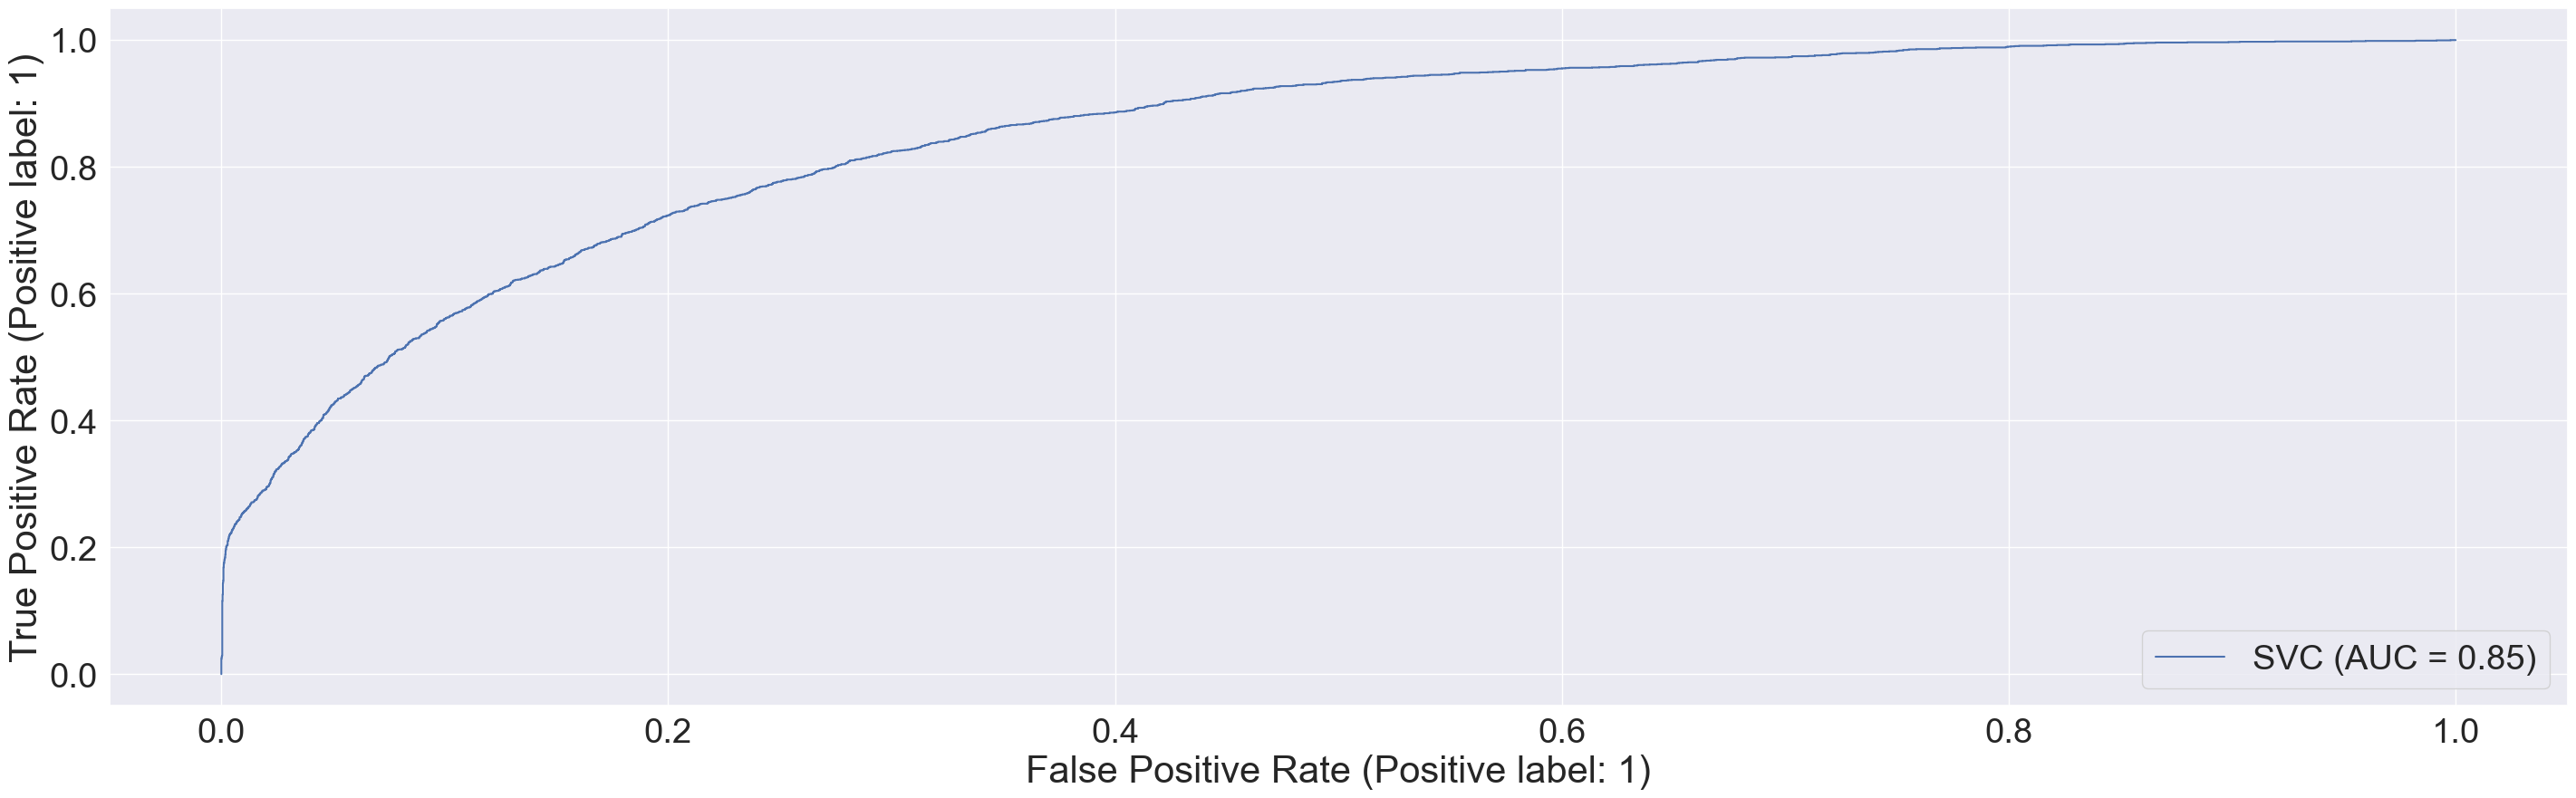

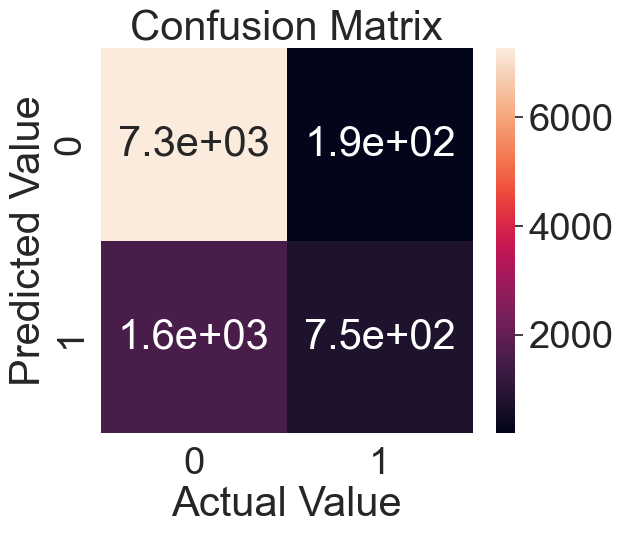

List of possible accuracy: [0.8138934954855352, 0.8196056753270684, 0.8099143094075371]

Maximum Accuracy: 81.96056753270685 %
Minimum Accuracy: 80.9914309407537 %
Overall Accuracy: 81.44711600733802 %
Standard Deviation is: 0.004871438763712525






In [22]:
for C in C_val:
    svm = SVC(kernel='linear', C=C)
    
    svm.fit(x_train, y_train)
    
    y_pred_test = svm.predict(x_test)
    y_pred_train = svm.predict(x_train)
    
    acc_test = accuracy_score(y_test, y_pred_test)
    acc_train = accuracy_score(y_train, y_pred_train)
    print("C value = ", C)
    print("Train Accuracy =", acc_train)
    print("Test Accuracy =", acc_test)
    
    print("\nClassification Report (check for overfitting and underfitting)")
    print(classification_report(y_test, y_pred_test))
    
    print("Classification accuracy =", acc_test)
    print("Classification error =", 1 - acc_test)
    
    plot_roc_curve(svm, x_test, y_test)
    
    plt.figure(figsize=(6,5))
    sns.heatmap(confusion_matrix(y_test, y_pred_test),annot = True)
    plt.xlabel('Actual Value')
    plt.ylabel('Predicted Value')
    plt.title('Confusion Matrix')
    plt.show()
    
    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)
    lst_accu_stratified = []
  
    for train_index, test_index in skf.split(x, y):
        x_train_fold, x_test_fold = x[train_index], x[test_index]
        y_train_fold, y_test_fold = y[train_index], y[test_index]
        svm.fit(x_train_fold, y_train_fold)
        y_pred_test_fold = svm.predict(x_test_fold)
        lst_accu_stratified.append(accuracy_score(y_pred_test_fold, y_test_fold))
        
    print('List of possible accuracy:', lst_accu_stratified)
    print('\nMaximum Accuracy:',max(lst_accu_stratified)*100, '%')
    print('Minimum Accuracy:', min(lst_accu_stratified)*100, '%')
    print('Overall Accuracy:', mean(lst_accu_stratified)*100, '%')
    print('Standard Deviation is:', stdev(lst_accu_stratified))
    print('\n\n\n')

### 9. Run SVM with polynomial kernel 
#### Run SVM with polynomial kernel and C=1.0
#### Run SVM with polynomial kernel and C=100.0
#### Run SVM with polynomial kernel and C=1000.0

### 11. Compare the train-set and test-set accuracy 
### 12. Check for overfitting and underfitting 
### 13. visualize confusion matrix with seaborn heatmap 
### 14. Generate classification report  
### 15. Evaluate classification accuracy 
### 16. Evaluate Classification error 
### 17. Plot ROC Curve 
### 18. Compute ROC AUC 
### 22. Stratified k-fold cross-validation with shuffle split with polynomial kernel

C value =  1.0
Train Accuracy = 0.8492453492453492
Test Accuracy = 0.8489098167673252

Classification Report (check for overfitting and underfitting)
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      7455
           1       0.75      0.55      0.63      2314

    accuracy                           0.85      9769
   macro avg       0.81      0.75      0.77      9769
weighted avg       0.84      0.85      0.84      9769

Classification accuracy = 0.8489098167673252
Classification error = 0.15109018323267476


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


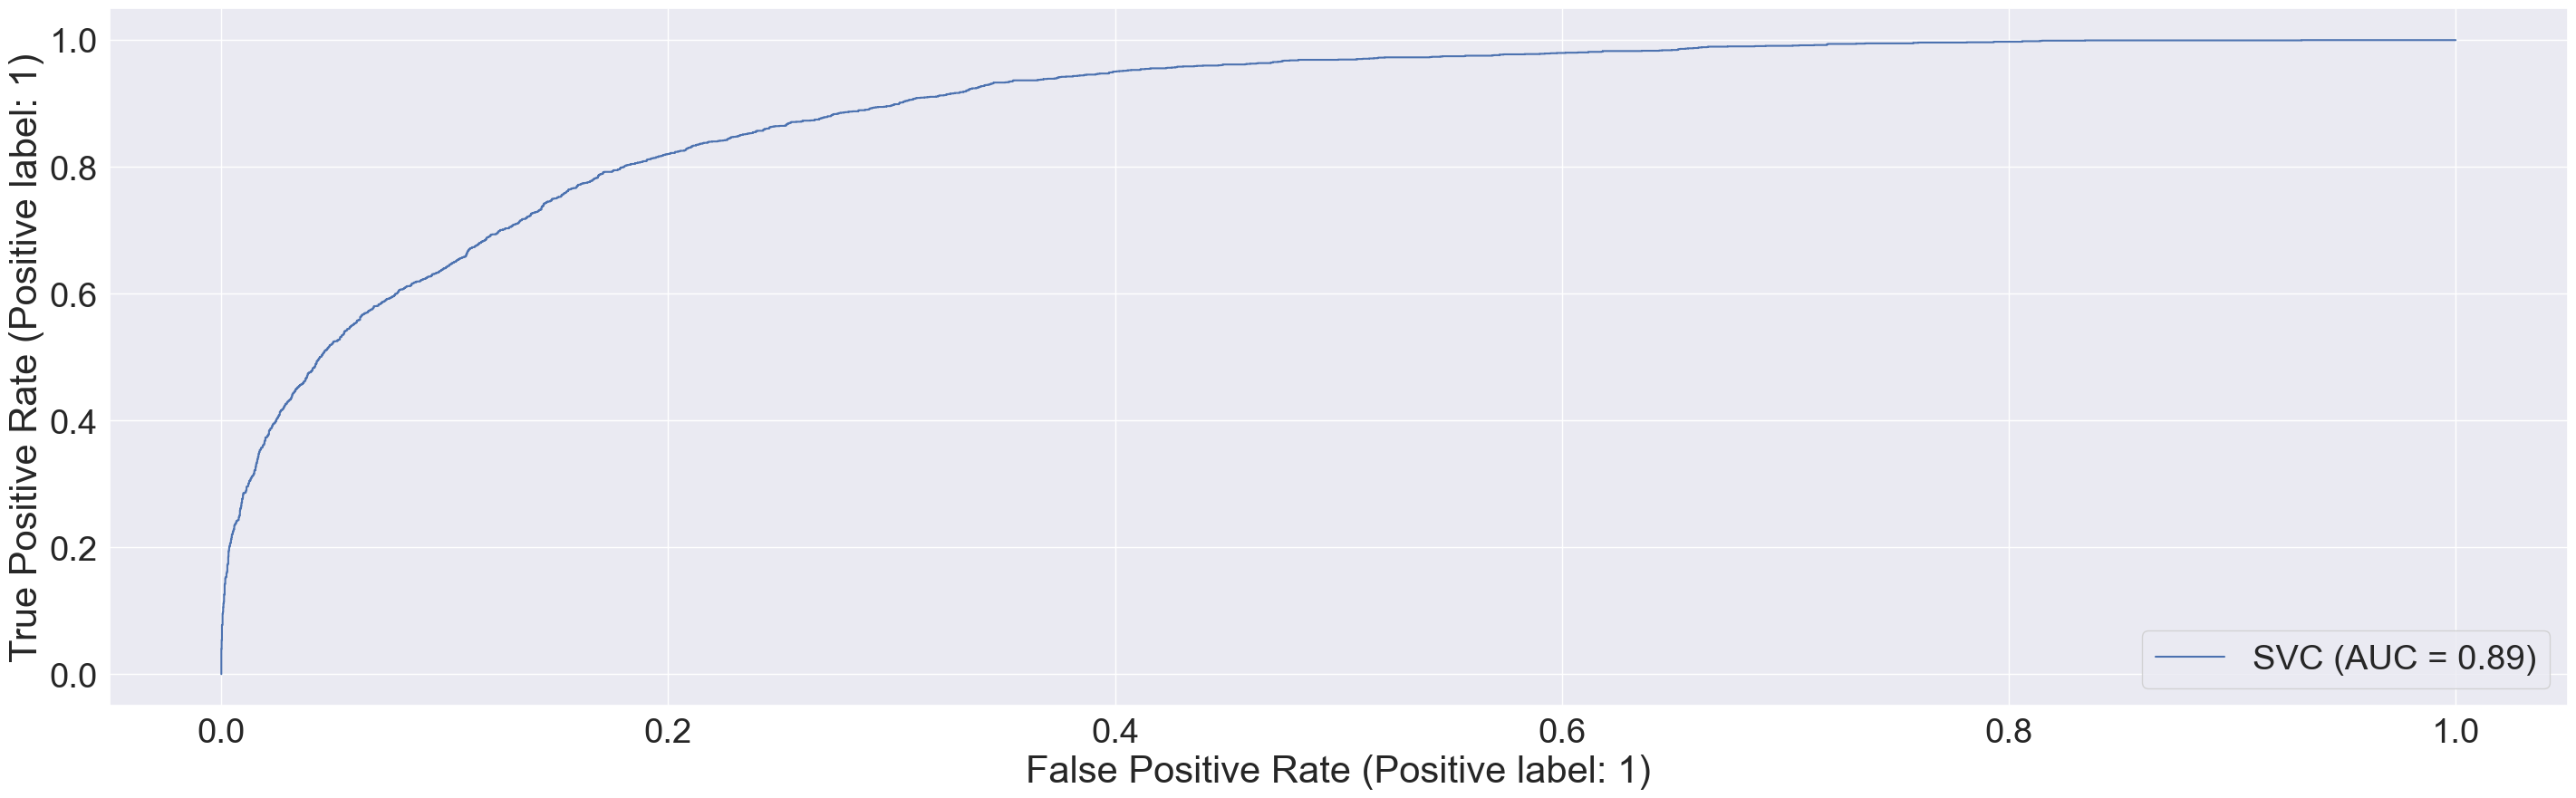

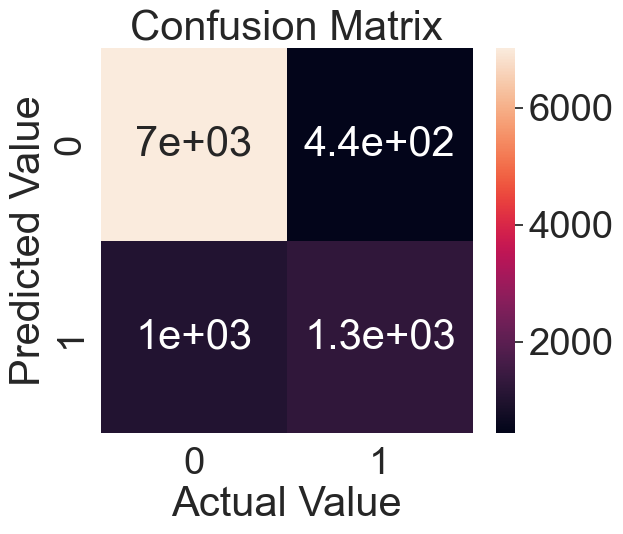

List of possible accuracy: [0.8427307904919845, 0.851391192187212, 0.8443748272367088]

Maximum Accuracy: 85.1391192187212 %
Minimum Accuracy: 84.27307904919846 %
Overall Accuracy: 84.61656033053018 %
Standard Deviation is: 0.004599543300867929




C value =  100.0
Train Accuracy = 0.853018603018603
Test Accuracy = 0.8480908997850343

Classification Report (check for overfitting and underfitting)
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      7455
           1       0.73      0.56      0.64      2314

    accuracy                           0.85      9769
   macro avg       0.80      0.75      0.77      9769
weighted avg       0.84      0.85      0.84      9769

Classification accuracy = 0.8480908997850343
Classification error = 0.15190910021496573


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


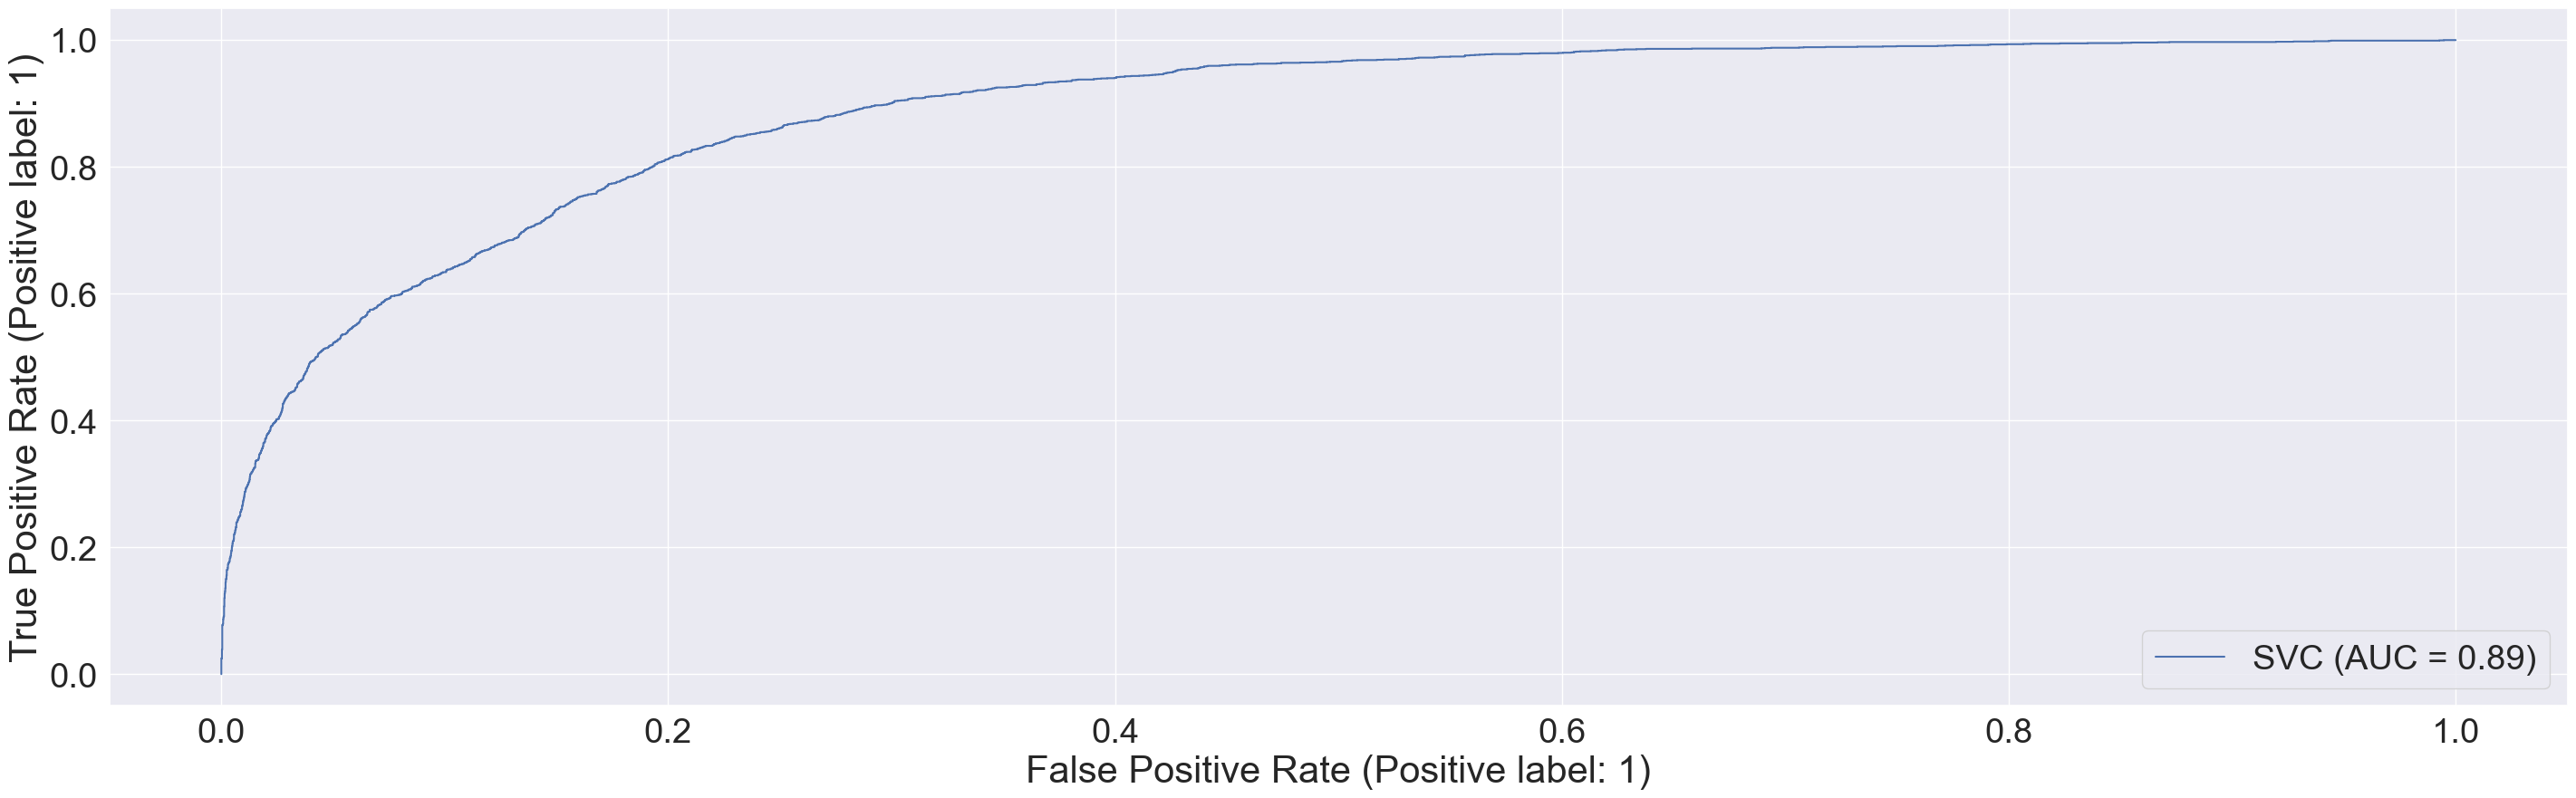

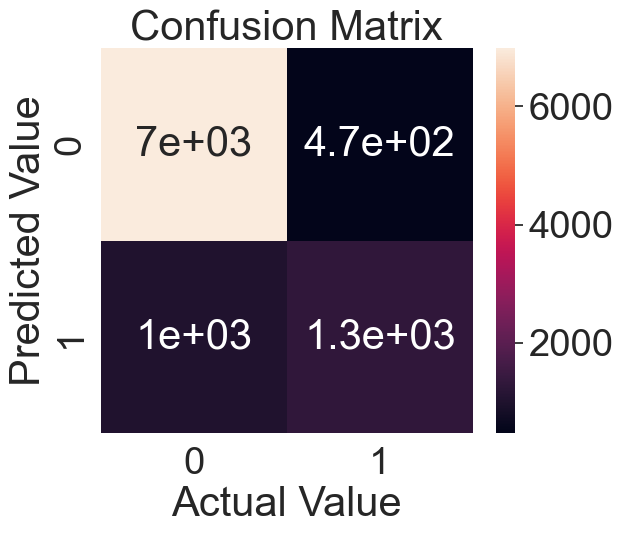

List of possible accuracy: [0.843928505620048, 0.8543394140409066, 0.844559108080715]

Maximum Accuracy: 85.43394140409066 %
Minimum Accuracy: 84.3928505620048 %
Overall Accuracy: 84.76090092472232 %
Standard Deviation is: 0.005837223345134019




C value =  1000.0
Train Accuracy = 0.8546858546858547
Test Accuracy = 0.8469648889343843

Classification Report (check for overfitting and underfitting)
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      7455
           1       0.73      0.56      0.63      2314

    accuracy                           0.85      9769
   macro avg       0.80      0.75      0.77      9769
weighted avg       0.84      0.85      0.84      9769

Classification accuracy = 0.8469648889343843
Classification error = 0.15303511106561574


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


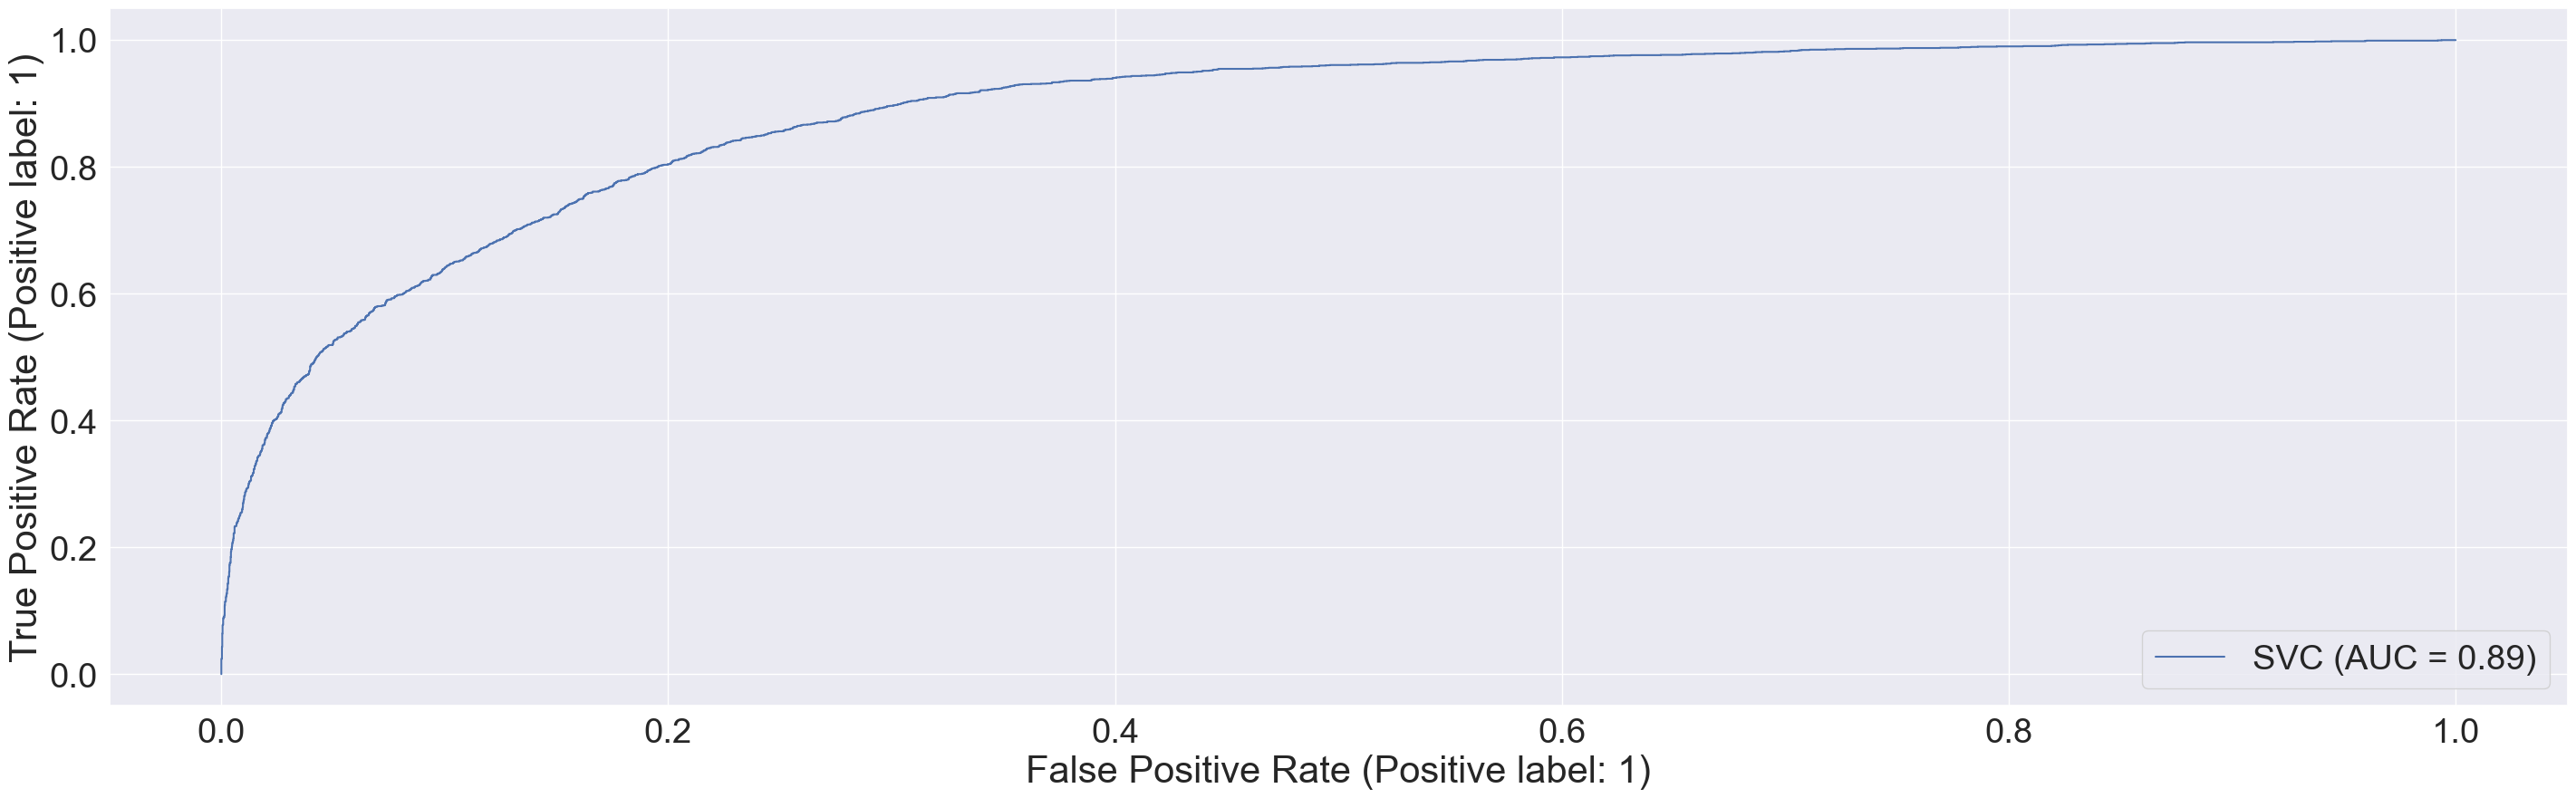

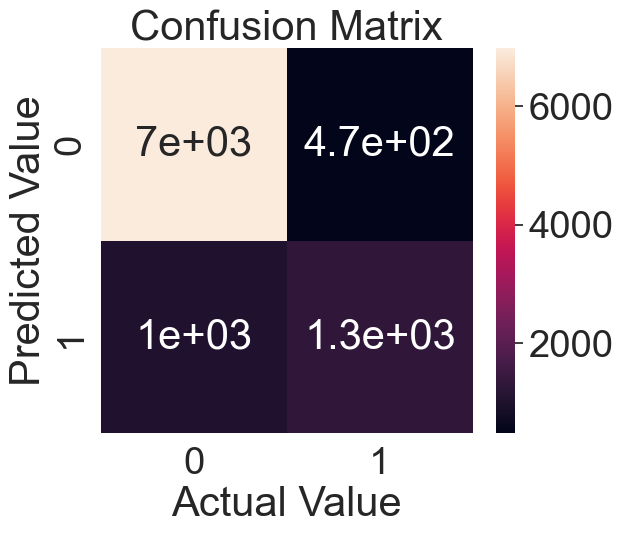

List of possible accuracy: [0.8420858669614889, 0.855352865303114, 0.842439878374643]

Maximum Accuracy: 85.53528653031141 %
Minimum Accuracy: 84.20858669614888 %
Overall Accuracy: 84.66262035464153 %
Standard Deviation is: 0.007559583327276191






In [23]:
for C in C_val:
    svm = SVC(kernel='poly', C=C)
    
    svm.fit(x_train, y_train)
    
    y_pred_test = svm.predict(x_test)
    y_pred_train = svm.predict(x_train)
    
    acc_test = accuracy_score(y_test, y_pred_test)
    acc_train = accuracy_score(y_train, y_pred_train)
    print("C value = ", C)
    print("Train Accuracy =", acc_train)
    print("Test Accuracy =", acc_test)
    
    print("\nClassification Report (check for overfitting and underfitting)")
    print(classification_report(y_test, y_pred_test))
    
    print("Classification accuracy =", acc_test)
    print("Classification error =", 1 - acc_test)
    
    plot_roc_curve(svm, x_test, y_test)
    
    plt.figure(figsize=(6,5))
    sns.heatmap(confusion_matrix(y_test, y_pred_test),annot = True)
    plt.xlabel('Actual Value')
    plt.ylabel('Predicted Value')
    plt.title('Confusion Matrix')
    plt.show()
    
    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)
    lst_accu_stratified = []
  
    for train_index, test_index in skf.split(x, y):
        x_train_fold, x_test_fold = x[train_index], x[test_index]
        y_train_fold, y_test_fold = y[train_index], y[test_index]
        svm.fit(x_train_fold, y_train_fold)
        y_pred_test_fold = svm.predict(x_test_fold)
        lst_accu_stratified.append(accuracy_score(y_pred_test_fold, y_test_fold))
        
    print('List of possible accuracy:', lst_accu_stratified)
    print('\nMaximum Accuracy:',max(lst_accu_stratified)*100, '%')
    print('Minimum Accuracy:', min(lst_accu_stratified)*100, '%')
    print('Overall Accuracy:', mean(lst_accu_stratified)*100, '%')
    print('Standard Deviation is:', stdev(lst_accu_stratified))
    print('\n\n\n')

### 10. Run SVM with sigmoid kernel 
#### Run SVM with sigmoid kernel and C=1.0
#### Run SVM with sigmoid kernel and C=100.0
#### Run SVM with sigmoid kernel and C=1000.0

### 11. Compare the train-set and test-set accuracy 
### 12. Check for overfitting and underfitting 
### 13. visualize confusion matrix with seaborn heatmap 
### 14. Generate classification report  
### 15. Evaluate classification accuracy 
### 16. Evaluate Classification error 
### 17. Plot ROC Curve 
### 18. Compute ROC AUC 
### 23. Stratified k-fold cross-validation with shuffle split with sigmoid kernel

C value =  1.0
Train Accuracy = 0.5848104598104598
Test Accuracy = 0.5960691984850036

Classification Report (check for overfitting and underfitting)
              precision    recall  f1-score   support

           0       0.73      0.74      0.74      7455
           1       0.14      0.14      0.14      2314

    accuracy                           0.60      9769
   macro avg       0.44      0.44      0.44      9769
weighted avg       0.59      0.60      0.59      9769

Classification accuracy = 0.5960691984850036
Classification error = 0.4039308015149964


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


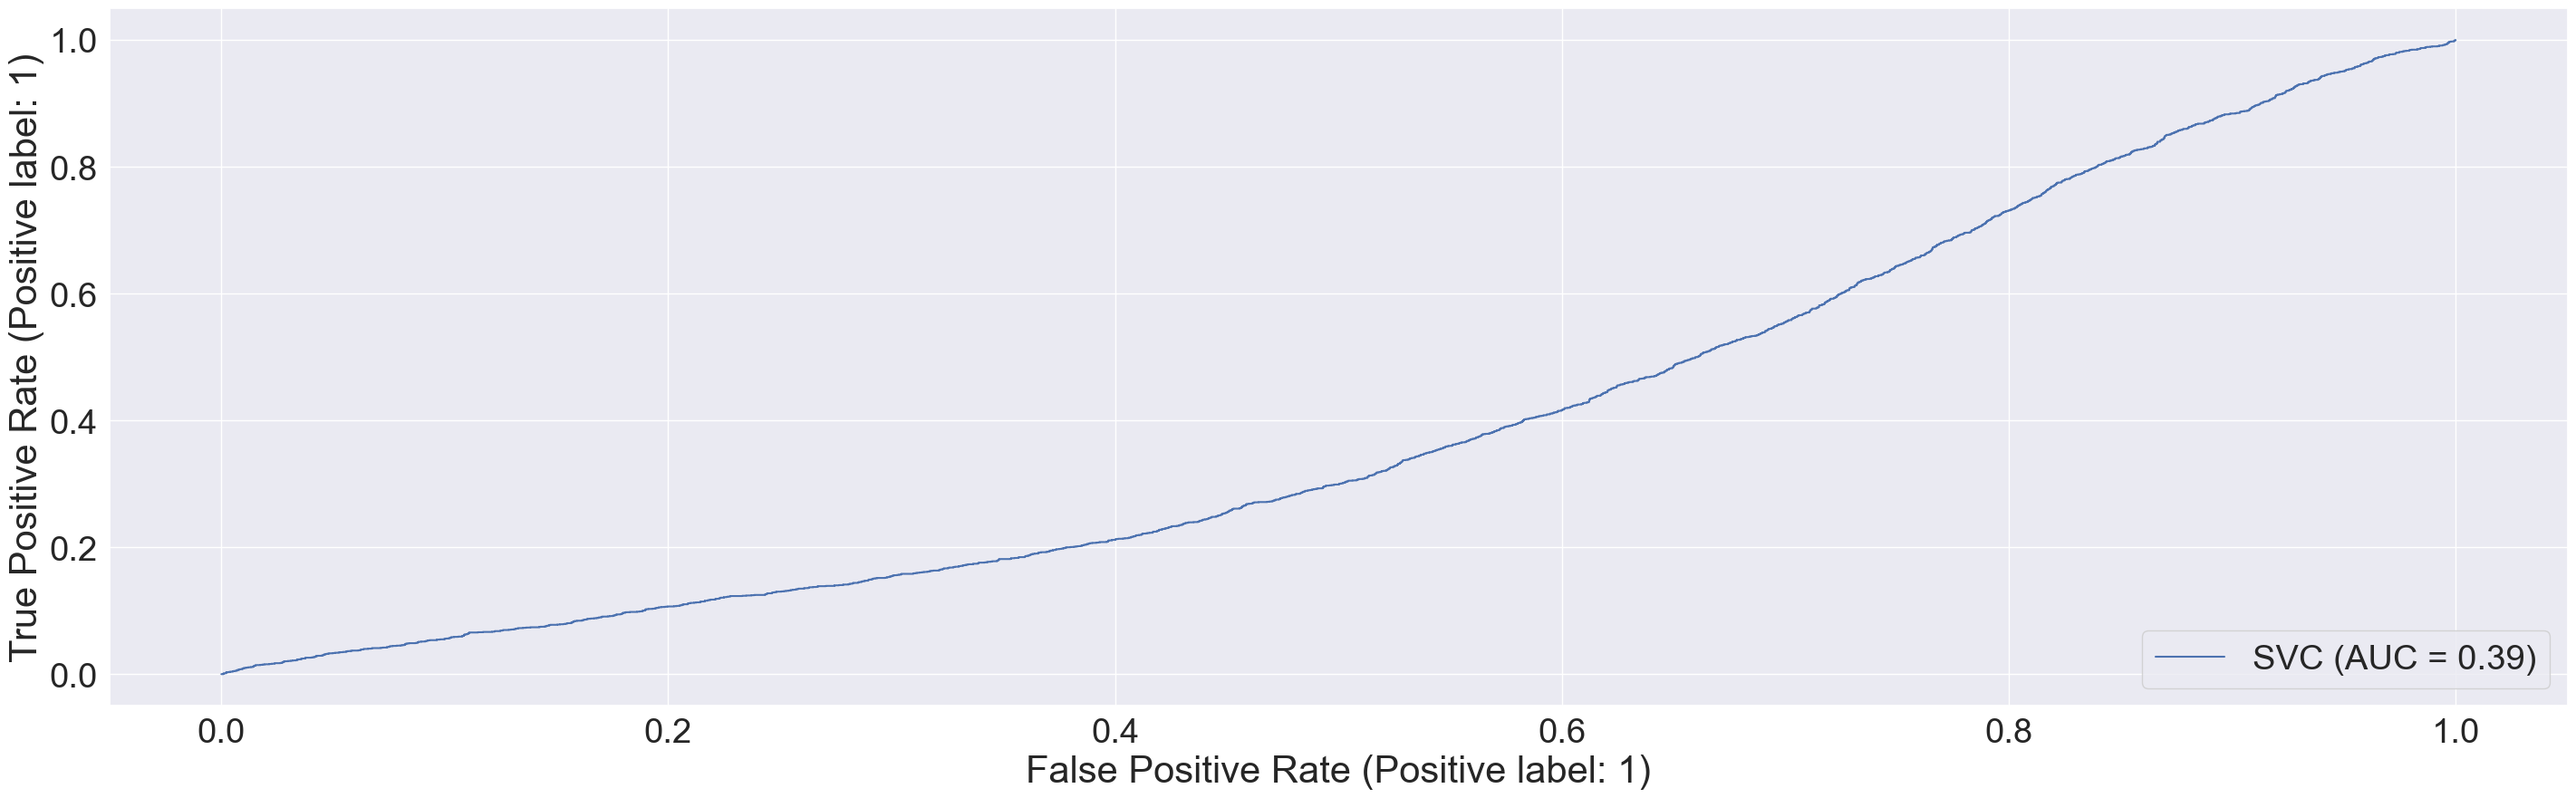

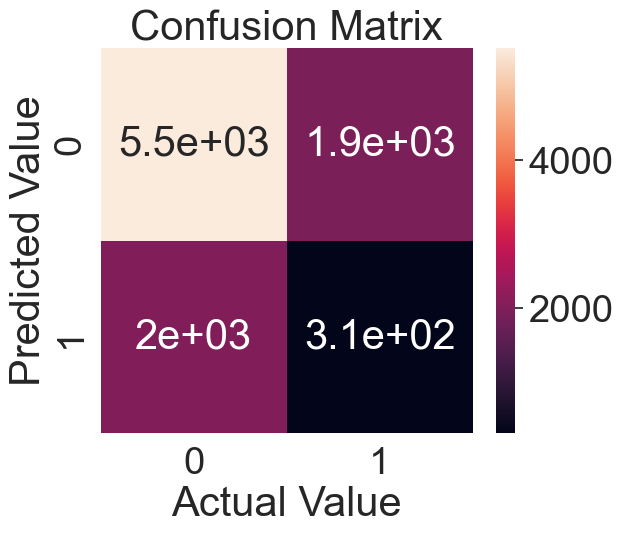

List of possible accuracy: [0.5811682329095265, 0.5924083287267367, 0.5893301391320372]

Maximum Accuracy: 59.240832872673664 %
Minimum Accuracy: 58.116823290952645 %
Overall Accuracy: 58.76355669227667 %
Standard Deviation is: 0.0058084954785503915




C value =  100.0
Train Accuracy = 0.5830554580554581
Test Accuracy = 0.5943289998976353

Classification Report (check for overfitting and underfitting)
              precision    recall  f1-score   support

           0       0.73      0.74      0.73      7455
           1       0.14      0.14      0.14      2314

    accuracy                           0.59      9769
   macro avg       0.44      0.44      0.44      9769
weighted avg       0.59      0.59      0.59      9769

Classification accuracy = 0.5943289998976353
Classification error = 0.4056710001023647


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


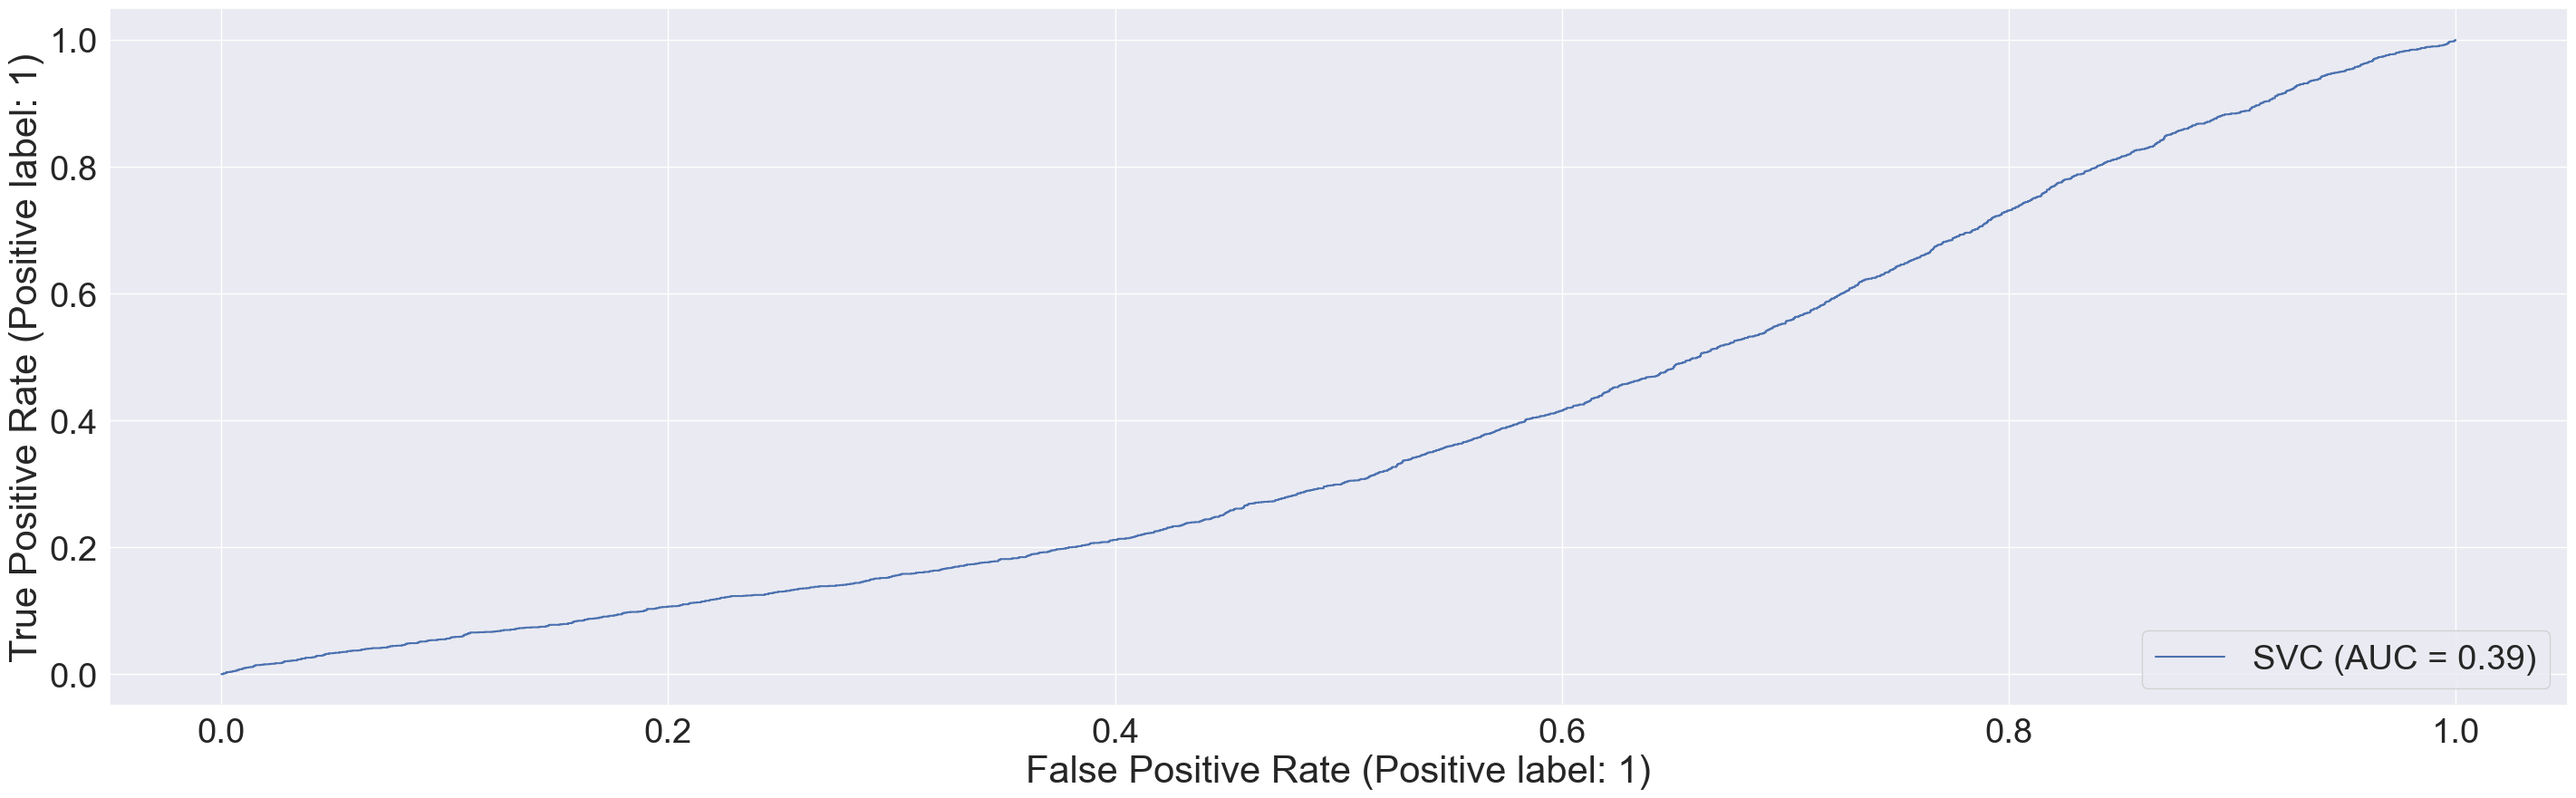

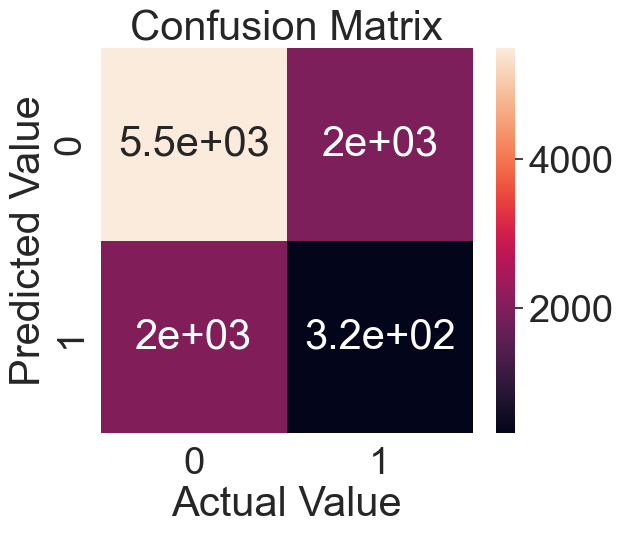

List of possible accuracy: [0.5786806707204717, 0.5903814262023217, 0.5874873306919746]

Maximum Accuracy: 59.03814262023217 %
Minimum Accuracy: 57.86806707204717 %
Overall Accuracy: 58.551647587158925 %
Standard Deviation is: 0.006094269542265717




C value =  1000.0
Train Accuracy = 0.5830554580554581
Test Accuracy = 0.5943289998976353

Classification Report (check for overfitting and underfitting)
              precision    recall  f1-score   support

           0       0.73      0.74      0.73      7455
           1       0.14      0.14      0.14      2314

    accuracy                           0.59      9769
   macro avg       0.44      0.44      0.44      9769
weighted avg       0.59      0.59      0.59      9769

Classification accuracy = 0.5943289998976353
Classification error = 0.4056710001023647


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


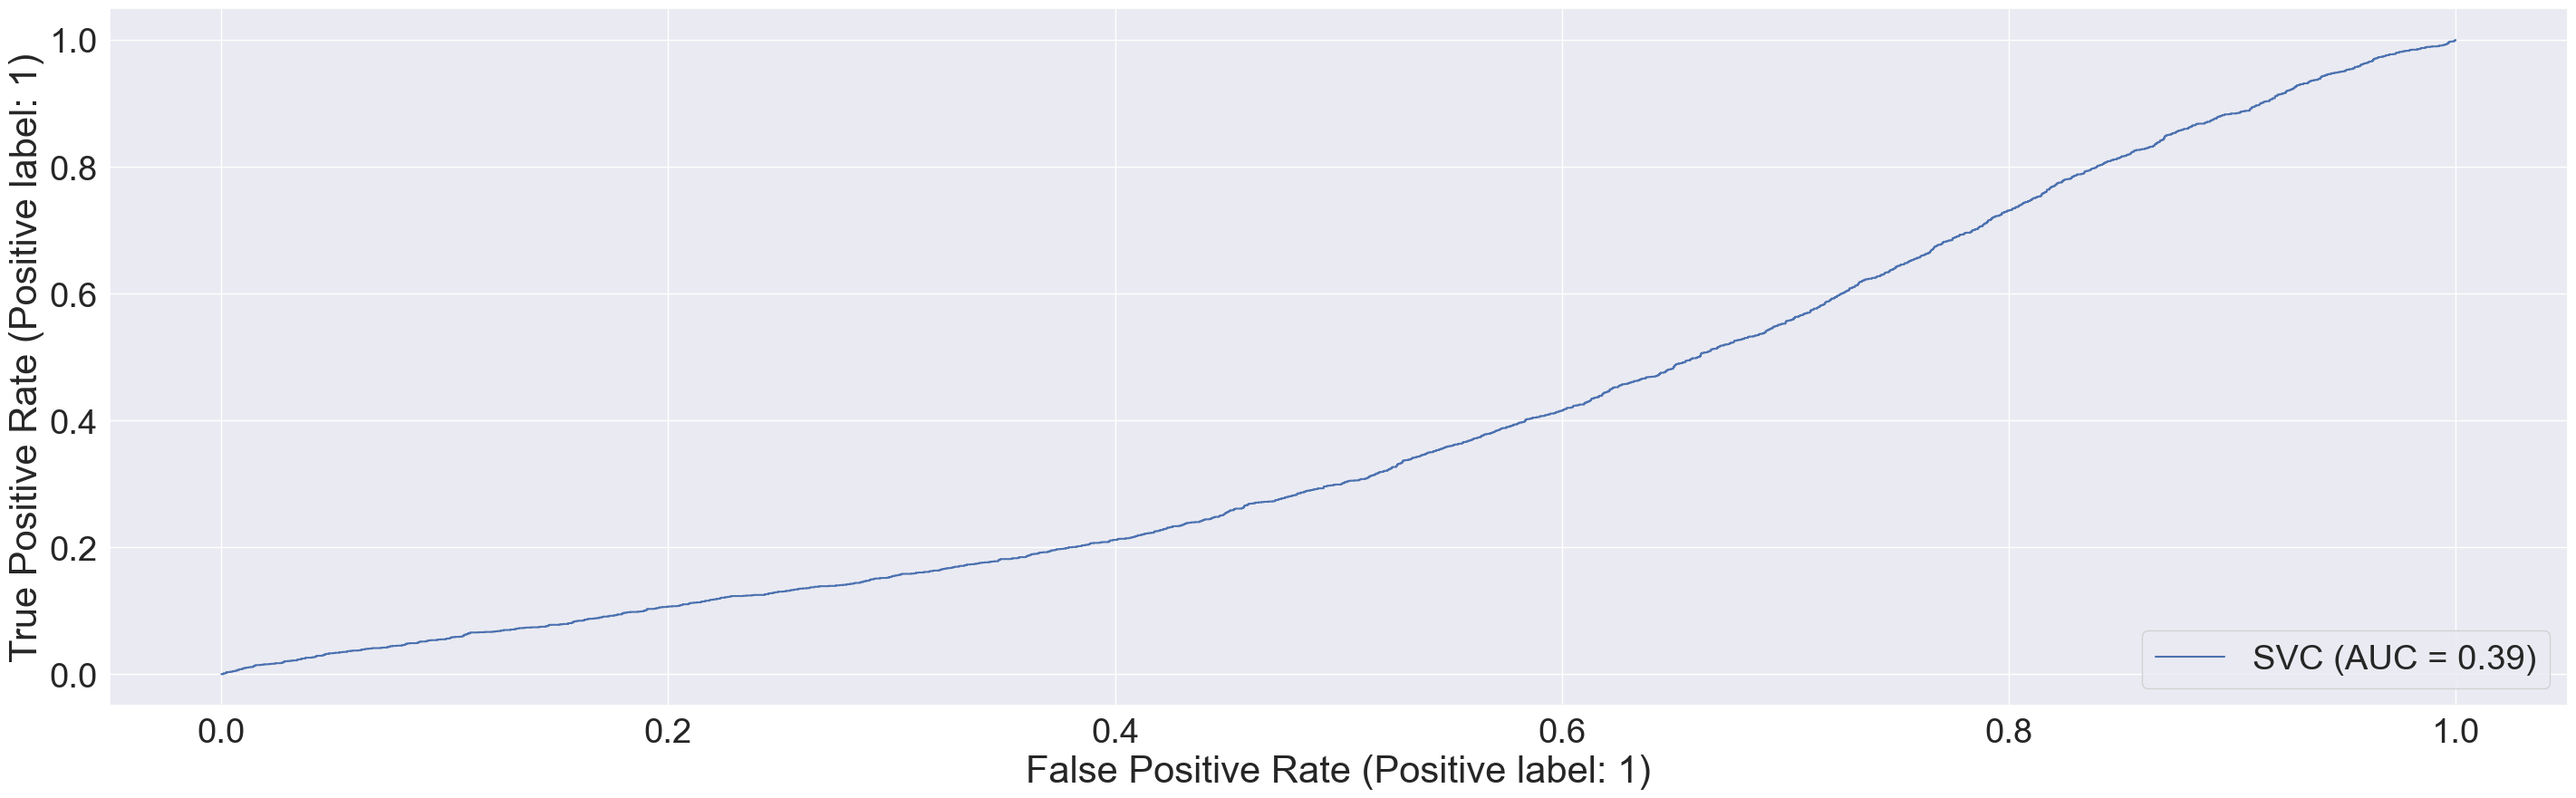

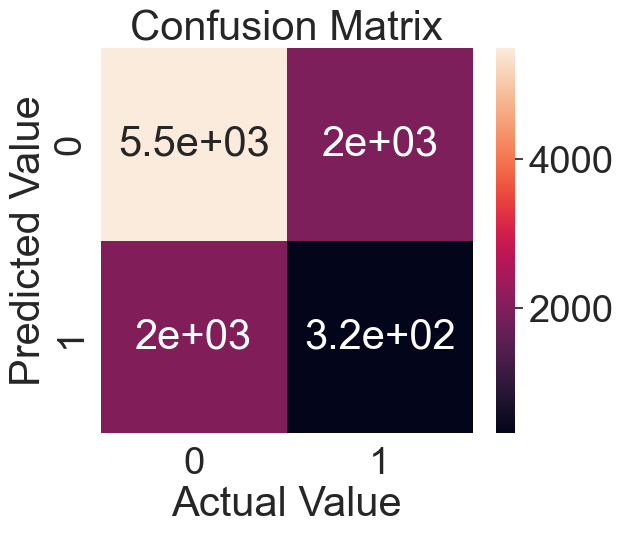

List of possible accuracy: [0.5784964068546158, 0.5903814262023217, 0.5873951902699714]

Maximum Accuracy: 59.03814262023217 %
Minimum Accuracy: 57.84964068546158 %
Overall Accuracy: 58.54243411089697 %
Standard Deviation is: 0.00618276685921458






In [24]:
for C in C_val:
    svm = SVC(kernel='sigmoid', C=C)
    
    svm.fit(x_train, y_train)
    
    y_pred_test = svm.predict(x_test)
    y_pred_train = svm.predict(x_train)
    
    acc_test = accuracy_score(y_test, y_pred_test)
    acc_train = accuracy_score(y_train, y_pred_train)
    print("C value = ", C)
    print("Train Accuracy =", acc_train)
    print("Test Accuracy =", acc_test)
    
    print("\nClassification Report (check for overfitting and underfitting)")
    print(classification_report(y_test, y_pred_test))
    
    print("Classification accuracy =", acc_test)
    print("Classification error =", 1 - acc_test)
    
    plot_roc_curve(svm, x_test, y_test)
    
    plt.figure(figsize=(6,5))
    sns.heatmap(confusion_matrix(y_test, y_pred_test),annot = True)
    plt.xlabel('Actual Value')
    plt.ylabel('Predicted Value')
    plt.title('Confusion Matrix')
    plt.show()
    
    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)
    lst_accu_stratified = []
  
    for train_index, test_index in skf.split(x, y):
        x_train_fold, x_test_fold = x[train_index], x[test_index]
        y_train_fold, y_test_fold = y[train_index], y[test_index]
        svm.fit(x_train_fold, y_train_fold)
        y_pred_test_fold = svm.predict(x_test_fold)
        lst_accu_stratified.append(accuracy_score(y_pred_test_fold, y_test_fold))
        
    print('List of possible accuracy:', lst_accu_stratified)
    print('\nMaximum Accuracy:',max(lst_accu_stratified)*100, '%')
    print('Minimum Accuracy:', min(lst_accu_stratified)*100, '%')
    print('Overall Accuracy:', mean(lst_accu_stratified)*100, '%')
    print('Standard Deviation is:', stdev(lst_accu_stratified))
    print('\n\n\n')